# Project 1: SAT & ACT Analysis
____________

### Riche Ngo, SG-DSI-18

## Problem Statement

As part of the College Board team, we want to gain as much recognition as possible on the national (U.S. nation) and global levels by increasing the SAT participation rates across the U.S. states. The other alternative test for college admission, ACT, has seen steady increase in their participation rates and even surpassed the SAT in 2012 for the first time in total test takers. Using the 2017/2018 SAT & ACT data, we want to figure out where can we best spend money as the College Board team to improve the SAT participation rates in the U.S.

## Executive Summary

This project explores the 2017/2018 SAT & ACT data which contains the state-by-state participation rates and mean scores for students who took the SAT and ACT tests in the U.S. for the years 2017 and 2018.

Exploratory data analysis revealed a seemingly strong positive correlation between the participation rates in 2017 and 2018 for both the SAT and ACT. However, due to students possibly taking both the SAT and ACT to increase the chances of college admissions, there may be self-selection bias which would skew the data used for analysis. Therefore, statistical inference which rely on the CLT or normality in the distribution of the variables in the dataset would not be reliable.

Several case studies have shown that a major influence in the participation rates for the SAT/ACT is whether the state has mandatory requirements for students to take the test. However, the caveat is if the state switches from one test to the other within a short notice period, educators and school systems may not be able to adjust immediately, resulting in delayed effects to the test participation rates. Based on the insights obtained through the data analysis, recommendations for the College Board to increase SAT's participation rates are made and attention is brought to invest efforts in the state of Oregon.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat2017_data = pd.read_csv('../data/sat_2017.csv')
act2017_data = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat2017_data.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act2017_data.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
sat2017_data.shape

(51, 5)

In [6]:
act2017_data.shape

(52, 7)

In [7]:
sat2017_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [8]:
act2017_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:  
**SAT Data**
* Contains the average SAT scores for all 51 states of the United states.
* The average SAT scores are shown for two sections, "Evidence-based Reading and Writing", & "Math".
* The state-by-state total scores for the two sections are shown. 
* The state-by-state participation rates for the SAT are shown.
* There are no null entries in this dataframe.
___
**ACT Data**
* Contains the average ACT scores for all 51 states of the United states.
* The average ACT scores are shown for four sections, "English", "Math", "Reading", & "Science".
* The state-by-state composite scores (average of the scores for the four sections) are shown. 
* The state-by-state participation rates for the ACT are shown.
* There are no null entries in this dataframe.

#### 4a. Does the data look complete? 

Answer:  
**SAT Data**  
The data seems complete.
___
**ACT Data**  
The data seems complete.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

|SAT Scoring|Evidence-based Reading and Writing|Math|Total|
|---|---|---|---|
|**Min**|200|200|400|
|**Max**|800|800|1600|

|ACT Scoring|English|Math|Reading|Science|Composite
|---|---|---|---|---|---|
|**Min**|1|1|1|1|1|
|**Max**|36|36|36|36|36|

In [9]:
sat2017_data.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [10]:
sat2017_data[~sat2017_data['Math'].between(200, 800)]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [11]:
act2017_data.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [12]:
act2017_data[act2017_data['Science'] == act2017_data['Science'].min()]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


Answer:  
**SAT Data**  
The minimum and maximum possible values for each subtest for the SAT are 200 and 800 respectively.  
After using the `.describe()` function on the dataframe, we can see that the lowest value in the "Math" column is 52, which does not meet the minimum possible value. Further investigation reveals that the data belongs to the state "Maryland".
Taking reference from the [data source](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/), this value needs to be changed to 524.
___
**ACT Data**  
The minimum and maximum possible values for each subtest for the ACT are 200 and 800 respectively.  
After using the `.describe()` function on the dataframe, we can see that the lowest value in the "Science" column is 2.3. Although this value is within the possible range, it is very low and may not be correct. Further investigation reveals that the data belongs to the state "Maryland".
Taking reference from the [data source](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows), this value needs to be changed to 23.2.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [13]:
sat2017_data_clean = sat2017_data.copy()
sat2017_data_clean.loc[sat2017_data_clean['State'] == 'Maryland', ['Math']] = 524
sat2017_data_clean.loc[sat2017_data_clean['State'] >= 'Maryland', :].head()   # To confirm change is made.

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060
21,Massachusetts,76%,555,551,1107
22,Michigan,100%,509,495,1005
23,Minnesota,3%,644,651,1295
24,Mississippi,2%,634,607,1242


In [14]:
act2017_data_clean = act2017_data.copy()
act2017_data_clean.loc[act2017_data_clean['State'] == 'Maryland', ['Science']] = 23.2
act2017_data_clean.loc[act2017_data_clean['State'] >= 'Maryland', :].head()   # To confirm change is made.

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6
22,Massachusetts,29%,25.4,25.3,25.9,24.7,25.4
23,Michigan,29%,24.1,23.7,24.5,23.8,24.1
24,Minnesota,100%,20.4,21.5,21.8,21.6,21.5


#### 5. What are your data types? 
Display the data types of each feature. 

In [15]:
sat2017_data_clean.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [16]:
act2017_data_clean.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:  
**SAT Data**  
* Values under "Participation" column are "object" types. It could be better represented by "float64" values since they are percentages.
___
**ACT Data**  
* Values under "Participation" column are "object" types. It could be better represented by "float64" values since they are percentages.
* Values under "Composite" column are "object" types. It could be better represented by "float64" values since they are average scores.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [17]:
def participation_to_float(df):
    df['Participation'] = df['Participation'].apply(lambda string: float(string.replace('%', '')) / 100)
    return df

In [18]:
# Calling the function on SAT dataframe
sat2017_data_clean = participation_to_float(sat2017_data_clean)
sat2017_data_clean.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [19]:
# Calling the function on ACT dataframe
act2017_data_clean = participation_to_float(act2017_data_clean)
act2017_data_clean.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


- Fix any individual values preventing other columns from being the appropriate type.

In [20]:
# Attempt to convert the values under "Composite" column in ACT dataframe to float64 dtype.
# If an error is raised we will know the location of error.
try:
    pd.to_numeric(act2017_data_clean['Composite'])
except:
    print('Error raised')
    
# The try-except commands were implemented so that the error will not stop the cells below from running in this Jupyter Notebook.

Error raised


In [21]:
# Taking a look at the location of error raised
act2017_data_clean.loc[[51], :]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,1.0,19.4,19.8,20.8,20.6,20.2x


In [22]:
# Update the value
act2017_data_clean.loc[[51], ['Composite']] = 20.2
act2017_data_clean.loc[[51], :]   # Check the updated value in dataframe

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,1.0,19.4,19.8,20.8,20.6,20.2


In [23]:
# Attempt to convert the values under "Composite" column in ACT dataframe to float64 dtype.
act2017_data_clean['Composite'] = pd.to_numeric(act2017_data_clean['Composite']);

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [24]:
sat2017_data_clean.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [25]:
act2017_data_clean.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [26]:
# Change the column names of SAT & ACT dataframes
# Only the 'state' column will not be unique as it will be the feature to be shared between dataframes
sat2017_data_clean.rename(columns = {'State': 'state',
                                    'Participation': 'sat_participation_2017',
                                    'Evidence-Based Reading and Writing': 'sat_erw_2017',
                                    'Math': 'sat_math_2017',
                                    'Total': 'sat_total_2017'}, inplace = True)
act2017_data_clean.rename(columns = {'State': 'state',
                                    'Participation': 'act_participation_2017',
                                    'English': 'act_english_2017',
                                    'Math': 'act_math_2017',
                                    'Reading': 'act_reading_2017',
                                    'Science': 'act_science_2017',
                                    'Composite': 'act_composite_2017'}, inplace = True);

In [27]:
# Check the column names of the SAT dataframe
sat2017_data_clean.columns

Index(['state', 'sat_participation_2017', 'sat_erw_2017', 'sat_math_2017',
       'sat_total_2017'],
      dtype='object')

In [28]:
# Check the column names of the ACT dataframe
act2017_data_clean.columns

Index(['state', 'act_participation_2017', 'act_english_2017', 'act_math_2017',
       'act_reading_2017', 'act_science_2017', 'act_composite_2017'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|2017 SAT & ACT|The state where the data was collected from.| 
|**sat_participation_2017**|*float*|2017 SAT|The participation rate of a state for the SAT test in Year 2017 (to two decimal places, i.e. 0.53 means 53%).|
|**sat_erw_2017**|*integer*|2017 SAT|The average SAT test score of a state for subject "Evidence-Based Reading and Writing" in Year 2017 (min 200, max 800).|
|**sat_math_2017**|*integer*|2017 SAT|The average SAT test score of a state for subject "Math" for a state in Year 2017 (min 200, max 800).|
|**sat_total_2017**|*integer*|2017 SAT|The total average SAT test score for a state for both subjects "Evidence-Based Reading and Writing" & "Math" in Year 2017 (min 400, max 1600).|
|**act_participation_2017**|*float*|2017 ACT|The participation rate of a state for the ACT test in Year 2017 (to two decimal places, i.e. 0.53 means 53%).|
|**act_english_2017**|*float*|2017 ACT|The average ACT test score of a state for subject "English" in Year 2017 (to one decimal place, min 1.0, max 36.0).|
|**act_math_2017**|*float*|2017 ACT|The average ACT test score of a state for subject "Math" in Year 2017 (to one decimal place, min 1.0, max 36.0).|
|**act_reading_2017**|*float*|2017 ACT|The average ACT test score of a state for subject "Reading" in Year 2017 (to one decimal place, min 1.0, max 36.0).|
|**act_science_2017**|*float*|2017 ACT|The average ACT test score of a state for subject "Science" in Year 2017 (to one decimal place, min 1.0, max 36.0).|
|**act_composite_2017**|*float*|2017 ACT|The mean of the average ACT test scores for all four subjects "English", "Math", "Reading", & "Science" within a state in Year 2017 (to one decimal place, min 1.0, max 36.0).|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [29]:
# Identifying which dataframe has an extra row
print(f'The 2017 SAT dataframe has {len(sat2017_data_clean.index)} rows.')
print(f'The 2017 ACT dataframe has {len(act2017_data_clean.index)} rows.')

The 2017 SAT dataframe has 51 rows.
The 2017 ACT dataframe has 52 rows.


In [30]:
# Confirm the extra row of data using 'state' since it is the column that supposedly matches between the two dataframes.
act2017_data_clean[~act2017_data_clean['state'].isin(sat2017_data_clean['state'])]

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,National,0.6,20.3,20.7,21.4,21.0,21.0


In [31]:
# Removing the extra row from ACT dataframe
act2017_data_clean = act2017_data_clean.drop(index = [0]).reset_index(drop = True)

In [32]:
# Confirm that the extra row has been removed.
print(f'The 2017 SAT dataframe has {len(sat2017_data_clean.index)} rows.')
print(f'The 2017 ACT dataframe has {len(act2017_data_clean.index)} rows.')

The 2017 SAT dataframe has 51 rows.
The 2017 ACT dataframe has 51 rows.


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [33]:
# Merge SAT and ACT dataframes on 'state', assign to new dataframe
combined_df_2017 = sat2017_data_clean.merge(act2017_data_clean, on = ['state'])

In [34]:
combined_df_2017.head()

,state,sat_participation_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [35]:
combined_df_2017.to_csv('../data/combined_2017.csv', index = False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

#### 1. Read In SAT & ACT  Data

In [36]:
# Downloaded 2018 files for ACT and SAT, provided by GA Instructional Team.  
# Renamed the ACT dataset 'act_2018.csv'.
# Read the datasets into dataframe objects

sat2018_data = pd.read_csv("../data/sat_2018.csv")
act2018_data = pd.read_csv("../data/act_2018.csv")

#### 2. Display Data

In [37]:
# Print the first 5 rows of the SAT dataframe to visualize the data
sat2018_data.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [38]:
# Print the first 5 rows of the ACT dataframe to visualize the data
act2018_data.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [39]:
# Understand the shape of the SAT dataframe
sat2018_data.shape

(51, 5)

In [40]:
# Understand the shape of the ACT dataframe
act2018_data.shape

(51, 7)

In [41]:
# Checking the SAT dataframe if there are null entries, checking the data types, and other info
sat2018_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [42]:
# Checking the ACT dataframe if there are null entries, checking the data types, and other info
act2018_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


#### 3. Describe Data

**SAT Data**
* Contains the average SAT scores for all 51 states of the United states.
* The average SAT scores are shown for two sections, "Evidence-based Reading and Writing", & "Math".
* The state-by-state total scores for the two sections are shown. 
* The state-by-state participation rates for the SAT are shown.
* There are no null entries in this dataframe.
___
**ACT Data**
* Contains the average ACT scores for all 51 states of the United states.
* The state-by-state composite scores (average of the scores for the four sections) are shown. 
* The average ACT scores are shown for four sections, "English", "Math", "Reading", & "Science".
* The state-by-state percentage of students tested for the ACT are shown.
* There are no null entries in this dataframe.

#### 4. Looking for obvious issues and solving them (if any)

In [43]:
# Checking the SAT dataframe for any obvious errors in values
# Note that for each subject, min possible value is 200 and max possible value is 800
sat2018_data.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [44]:
# Checking the ACT dataframe for any obvious errors in values
# Note that for each subject, min possible value is 1 and max possible value is 36
act2018_data.describe()

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


#### 5. Fix Data Types
Based on what we discovered above:
- Values under "Participation" column of the SAT dataframe are "object" types. It could be better represented by "float64" values since they are percentages. We can use the `participation_to_float` defined earlier.
- Values under "Percentage of Students Tested" column of the ACT dataframe are "int64" types. We can reformat these values and change them to "float64" so that it is more consistent across dataframes.

In [45]:
# Make independent copies of the dataframes
sat2018_data_clean = sat2018_data.copy()
act2018_data_clean = act2018_data.copy()

In [46]:
# Correcting the values under "Participation" column for the SAT dataframe
sat2018_data_clean = participation_to_float(sat2018_data_clean)
sat2018_data_clean.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [47]:
# Changing the values under "Percentage of Students Tested" column for the ACT dataframe
act2018_data_clean['Percentage of Students Tested'] = act2018_data_clean['Percentage of Students Tested'] / 100
act2018_data_clean.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.27,22.7,22.5,22.5,23.0,22.1


In [48]:
# Checking the data types for the SAT dataframe
sat2018_data_clean.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [49]:
# Checking the data types for the ACT dataframe
act2018_data_clean.dtypes

State                             object
Percentage of Students Tested    float64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

#### 6. Rename Columns

In [50]:
# Change the column names of SAT & ACT dataframes
# Only the 'state' column will not be unique as it will be the feature to be shared between dataframes
sat2018_data_clean.rename(columns = {'State': 'state',
                                    'Participation': 'sat_participation_2018',
                                    'Evidence-Based Reading and Writing': 'sat_erw_2018',
                                    'Math': 'sat_math_2018',
                                    'Total': 'sat_total_2018'}, inplace = True)
act2018_data_clean.rename(columns = {'State': 'state',
                                    'Percentage of Students Tested': 'act_participation_2018',
                                    'Average Composite Score': 'act_composite_2018',
                                    'Average English Score': 'act_english_2018',
                                    'Average Math Score': 'act_math_2018',
                                    'Average Reading Score': 'act_reading_2018',
                                    'Average Science Score': 'act_science_2018'}, inplace = True);

In [51]:
# Check the column names of the SAT dataframe
sat2018_data_clean.columns

Index(['state', 'sat_participation_2018', 'sat_erw_2018', 'sat_math_2018',
       'sat_total_2018'],
      dtype='object')

In [52]:
# Check the column names of the ACT dataframe
act2018_data_clean.columns

Index(['state', 'act_participation_2018', 'act_composite_2018',
       'act_english_2018', 'act_math_2018', 'act_reading_2018',
       'act_science_2018'],
      dtype='object')

In [53]:
# Rearranging columns for the ACT dataframe
# Moving the "act_composite_2018" column to the back
act2018_data_clean = act2018_data_clean[['state', 'act_participation_2018', 'act_english_2018', 'act_math_2018',
                                         'act_reading_2018', 'act_science_2018', 'act_composite_2018']]

#### 8. Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|2018 SAT & ACT|The state where the data was collected from.| 
|**sat_participation_2018**|*float*|2018 SAT|The participation rate of a state for the SAT test in Year 2018 (to two decimal places, i.e. 0.53 means 53%).|
|**sat_erw_2018**|*integer*|2018 SAT|The average SAT test score of a state for subject "Evidence-Based Reading and Writing" in Year 2018 (min 200, max 800).|
|**sat_math_2018**|*integer*|2018 SAT|The average SAT test score of a state for subject "Math" for a state in Year 2018 (min 200, max 800).|
|**sat_total_2018**|*integer*|2018 SAT|The total average SAT test score for a state for both subjects "Evidence-Based Reading and Writing" & "Math" in Year 2018 (min 400, max 1600).|
|**act_participation_2018**|*float*|2018 ACT|The participation rate of a state for the ACT test in Year 2018 (to two decimal places, i.e. 0.53 means 53%).|
|**act_english_2018**|*float*|2018 ACT|The average ACT test score of a state for subject "English" in Year 2018 (to one decimal place, min 1.0, max 36.0).|
|**act_math_2018**|*float*|2018 ACT|The average ACT test score of a state for subject "Math" in Year 2018 (to one decimal place, min 1.0, max 36.0).|
|**act_reading_2018**|*float*|2018 ACT|The average ACT test score of a state for subject "Reading" in Year 2018 (to one decimal place, min 1.0, max 36.0).|
|**act_science_2018**|*float*|2018 ACT|The average ACT test score of a state for subject "Science" in Year 2018 (to one decimal place, min 1.0, max 36.0).|
|**act_composite_2018**|*float*|2018 ACT|The mean of the average ACT test scores for all four subjects "English", "Math", "Reading", & "Science" within a state in Year 2018 (to one decimal place, min 1.0, max 36.0).|

#### 9. Merge Dataframes

In [54]:
# Merge SAT and ACT dataframes on 'state', assign to new dataframe
combined_df_2018 = sat2018_data_clean.merge(act2018_data_clean, on = ['state'])

In [55]:
# Display first 5 rows of combined dataframe
combined_df_2018.head()

,state,sat_participation_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
0,Alabama,0.06,595,571,1166,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.43,562,544,1106,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.29,577,572,1149,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.60,540,536,1076,0.27,22.5,22.5,23.0,22.1,22.7


#### 10. Save cleaned, merged dataframe

Data is saved as `combined_2018.csv`.

In [56]:
combined_df_2018.to_csv('../data/combined_2018.csv', index = False)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [57]:
# Check for identical names between the 2018 and 2017
# We should see that only 'state' is a common column name
for column_name in combined_df_2017.columns:
    if column_name in combined_df_2018.columns:
        print("'{}' is a common column name between the two dataframes.".format(column_name))

'state' is a common column name between the two dataframes.


In [58]:
# Merge 2018 and 2017 dataframes on 'state', assign to new dataframe
final_df = combined_df_2018.merge(combined_df_2017, on = ['state'])

In [59]:
# Display first 5 rows of combined dataframe
final_df.head()

,state,sat_participation_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,...,sat_participation_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,Alabama,0.06,595,571,1166,1.00,18.9,18.3,19.6,19.0,...,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.43,562,544,1106,0.33,19.8,20.6,21.6,20.7,...,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.29,577,572,1149,0.66,18.2,19.4,19.5,19.2,...,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.05,592,576,1169,1.00,19.1,18.9,19.7,19.4,...,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.60,540,536,1076,0.27,22.5,22.5,23.0,22.1,...,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [60]:
# Save the dataframe to .csv file
final_df.to_csv('../data/final.csv', index = False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [61]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_2018,51.0,0.457451,0.373143,0.02,0.045,0.52,0.775,1.0
sat_erw_2018,51.0,563.686275,47.502627,480.00,534.500,552.00,610.500,643.0
sat_math_2018,51.0,556.235294,47.772623,480.00,522.500,544.00,593.500,655.0
sat_total_2018,51.0,1120.019608,94.155083,977.00,1057.500,1098.00,1204.000,1298.0
act_participation_2018,51.0,0.616471,0.340810,0.07,0.285,0.66,1.000,1.0
act_english_2018,51.0,20.988235,2.446356,16.60,19.100,20.20,23.700,26.0
act_math_2018,51.0,21.125490,2.035765,17.80,19.400,20.70,23.150,25.2
act_reading_2018,51.0,22.015686,2.167245,18.00,20.450,21.60,24.100,26.1
act_science_2018,51.0,21.345098,1.870114,17.90,19.850,21.10,23.050,24.9
act_composite_2018,51.0,21.486275,2.106278,17.70,19.950,21.30,23.550,25.6


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [62]:
# Function which takes in a data series and calculates the standard deviation
calc_std = lambda ds: np.sqrt(sum([(x - ds.mean())**2 for x in ds]) / len(ds))

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [63]:
# Dictionary which apply std function
sd = {key: calc_std(final_df[key]) for key in final_df.columns[1:]}
sd

{'sat_participation_2018': 0.3694661922353942,
 'sat_erw_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433,
 'act_participation_2018': 0.33745194881997503,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.015707255555717,
 'act_reading_2018': 2.145891884510421,
 'act_science_2018': 1.8516885484833543,
 'act_composite_2018': 2.0855261815801147,
 'sat_participation_2017': 0.3492907076664507,
 'sat_erw_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 0.3182417575123181,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7222161451443676,
 'act_composite_2017': 2.000786081581989}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [64]:
# Dictionary to show differences between manual calculations and pandas describe method
{key: calc_std(final_df[key]) - final_df[key].std() for key in final_df.columns[1:]}

{'sat_participation_2018': -0.0036763710685254747,
 'sat_erw_2018': -0.468017594739905,
 'sat_math_2018': -0.4706777171760308,
 'sat_total_2018': -0.9276589063316578,
 'act_participation_2018': -0.0033578135367494655,
 'act_english_2018': -0.024102619659025937,
 'act_math_2018': -0.020057282622006234,
 'act_reading_2018': -0.02135268396998935,
 'act_science_2018': -0.01842521548826026,
 'act_composite_2018': -0.020752015415062885,
 'sat_participation_2017': -0.0034756150336796576,
 'sat_erw_2017': -0.4499311833106603,
 'sat_math_2017': -0.4642615207482592,
 'sat_total_2017': -0.911301157403031,
 'act_participation_2017': -0.0031666626465502445,
 'act_english_2017': -0.023189502866693523,
 'act_math_2017': -0.019527466306875185,
 'act_reading_2017': -0.020367695003050024,
 'act_science_2017': -0.017136901136876714,
 'act_composite_2017': -0.019908809572352304}

In [65]:
# Dictionary to show differences between manual calculations and numpy std method
{key: calc_std(final_df[key]) - np.std(final_df[key]) for key in final_df.columns[1:]}

{'sat_participation_2018': 0.0,
 'sat_erw_2018': 0.0,
 'sat_math_2018': 0.0,
 'sat_total_2018': 0.0,
 'act_participation_2018': 0.0,
 'act_english_2018': 0.0,
 'act_math_2018': 0.0,
 'act_reading_2018': 0.0,
 'act_science_2018': 0.0,
 'act_composite_2018': 0.0,
 'sat_participation_2017': 0.0,
 'sat_erw_2017': 0.0,
 'sat_math_2017': 0.0,
 'sat_total_2017': 0.0,
 'act_participation_2017': 0.0,
 'act_english_2017': 0.0,
 'act_math_2017': 0.0,
 'act_reading_2017': 0.0,
 'act_science_2017': 0.0,
 'act_composite_2017': 0.0}

Answer:  
We noticed that the standard deviation (std) calculated using the above formula is always slightly lesser than the std calculated by the pandas `describe` method. This is likely because the `describe` method calculates the _estimated_ std where the denominator of the above formula is _n-1_ instead of _n_.  

There are no differences between the std calculated manually and the std calculated by numpy's `std` method. This means that numpy adopts the above formula for std calculation.

### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#### Highest Participation Rates for SAT 2017

In [66]:
# Show top 10 states with the highest participate rates for SAT 2017
final_df[['state', 'sat_participation_2017']].sort_values(by = ['sat_participation_2017'], ascending = False).head(10)

,state,sat_participation_2017
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96
19,Maine,0.95
12,Idaho,0.93
9,Florida,0.83
21,Massachusetts,0.76
39,Rhode Island,0.71


#### Highest Participation Rates for SAT 2018

In [67]:
# Show top 10 states with the highest participate rates for SAT 2018
final_df[['state', 'sat_participation_2018']].sort_values(by = ['sat_participation_2018'], ascending = False).head(10)

,state,sat_participation_2018
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
22,Michigan,1.00
12,Idaho,1.00
19,Maine,0.99
13,Illinois,0.99
39,Rhode Island,0.97
29,New Hampshire,0.96
8,District of Columbia,0.92


**Observation:**  
Michigan, Connecticut, and Delaware appeared in the top 5 for both SAT 2017 and SAT 2018 with a 100% participation rate. We also see Colorado and Illinois appeared in the top 10 participation with a 100% participation rate in 2018.

In [68]:
# Checking to see the change in participation year-to-year for District of Columbia
final_df[['state', 'sat_participation_2017', 'sat_participation_2018']].loc[final_df['state'] == 'District of Columbia']

,state,sat_participation_2017,sat_participation_2018
8,District of Columbia,1.0,0.92


**Observation:**  
The participation rate for District of Columbia dropped from 100% in SAT 2017 to 92% in SAT 2018.  
The 8% drop in participation rate may not be so significant.

#### Lowest Participation Rates for SAT 2017

In [69]:
# Show bottom 10 states with the lowest participate rates for SAT 2017
final_df[['state', 'sat_participation_2017']].sort_values(by = ['sat_participation_2017']).head(10)

,state,sat_participation_2017
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03
23,Minnesota,0.03
50,Wyoming,0.03


#### Lowest Participation Rates for SAT 2018

In [70]:
# Show bottom 10 states with the lowest participate rates for SAT 2018
final_df[['state', 'sat_participation_2018']].sort_values(by = ['sat_participation_2018']).head(10)

,state,sat_participation_2018
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03
24,Mississippi,0.03
15,Iowa,0.03
44,Utah,0.04
23,Minnesota,0.04
18,Louisiana,0.04


**Observation:**  
North Dakota has the lowest participation rate of 2% for both SAT 2017 and SAT 2018.

#### Highest Participation Rates for ACT 2017

In [71]:
# Show top 20 states with the highest participate rates for ACT 2017
top_20_participation_act2017 = final_df[['state', 'act_participation_2017']].sort_values(by = ['act_participation_2017'], ascending = False).head(20)
top_20_participation_act2017

,state,act_participation_2017
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
35,Oklahoma,1.00
33,North Carolina,1.00
28,Nevada,1.00
26,Montana,1.00


#### Highest Participation Rates for ACT 2018

In [72]:
# Show top 20 states with the highest participate rates for ACT 2018
top_20_participation_act2018 = final_df[['state', 'act_participation_2018']].sort_values(by = ['act_participation_2018'], ascending = False).head(20)
top_20_participation_act2018

,state,act_participation_2018
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Ohio,1.00
35,Oklahoma,1.00
33,North Carolina,1.00
28,Nevada,1.00


In [73]:
# Check which states are overlapping
print(top_20_participation_act2017['state'].isin(top_20_participation_act2018['state']).value_counts())
top_20_participation_act2017[top_20_participation_act2017['state'].isin(top_20_participation_act2018['state'])]

True     18
False     2
Name: state, dtype: int64


,state,act_participation_2017
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
35,Oklahoma,1.00
33,North Carolina,1.00
28,Nevada,1.00
26,Montana,1.00


**Observation:**  
There are 18 states with a 100% participation rate which appeared in the top 20 for both ACT 2017 and ACT 2018. It may appear that the there are more ACT test takers than SAT test takers for both years. However, we are unable to make that claim since we lack information on the total number of eligible students for each state.

In [74]:
# Checking to see the change in participation year-to-year for Colorado
final_df[['state', 'act_participation_2017', 'act_participation_2018']].loc[final_df['state'] == 'Colorado']

,state,act_participation_2017,act_participation_2018
5,Colorado,1.0,0.3


**Observation:**  
The participation rate for Colorado dropped from 100% in ACT 2017 to 30% in ACT 2018.  
The 70% drop in participation rate is very significant and should be investigated. Earlier we also noticed that in 2018 the SAT participation rate for Colorado shot up to 100%.

#### Lowest Participation Rates for ACT 2017

In [75]:
# Show bottom 10 states with the lowest participate rates for ACT 2017
final_df[['state', 'act_participation_2017']].sort_values(by = ['act_participation_2017']).head(10)

,state,act_participation_2017
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23
20,Maryland,0.28
45,Vermont,0.29
21,Massachusetts,0.29
22,Michigan,0.29
46,Virginia,0.29


#### Lowest Participation Rates for ACT 2018

In [76]:
# Show bottom 10 states with the lowest participate rates for ACT 2018
final_df[['state', 'act_participation_2018']].sort_values(by = ['act_participation_2018']).head(10)

,state,act_participation_2018
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20
22,Michigan,0.22
47,Washington,0.24
45,Vermont,0.24
46,Virginia,0.24
21,Massachusetts,0.25


**Observation:**  
Similar states (shown above) have the lowest participation rates for both ACT 2017 and ACT 2018.  
Delaware and Michigan are among these states, both of which have a 100% participation rate in both SAT 2017 and SAT 2018.

#### Highest Total Scores for SAT 2017

In [77]:
# Show top 10 states with the highest total score for SAT 2017
final_df[['state', 'sat_total_2017']].sort_values(by = ['sat_total_2017'], ascending = False).head(10)

,state,sat_total_2017
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260
34,North Dakota,1256
27,Nebraska,1253
17,Kentucky,1247
24,Mississippi,1242
44,Utah,1238


#### Highest Total Scores for SAT 2018

In [78]:
# Show top 10 states with the highest total score for SAT 2018
final_df[['state', 'sat_total_2018']].sort_values(by = ['sat_total_2018'], ascending = False).head(10)

,state,sat_total_2018
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265
25,Missouri,1262
50,Wyoming,1257
27,Nebraska,1252
17,Kentucky,1248
41,South Dakota,1240


**Observation:**  
There are 7 states (i.e. Minnesota, Wisconsin, Iowa, Kansas, Missouri, Nebraska, Kentucky) which appeared in the top 10 highest total scores for both SAT 2017 and SAT 2018.  
Minnesota and Wisconsin are ranked 1st and 2nd respectively in terms of SAT total score for both 2017 and 2018.

#### Lowest Total Scores for SAT 2017

In [79]:
# Show bottom 10 states with the lowest total score for SAT 2017
final_df[['state', 'sat_total_2017']].sort_values(by = ['sat_total_2017']).head(10)

,state,sat_total_2017
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012
9,Florida,1017
43,Texas,1020
6,Connecticut,1041
35,Oklahoma,1047
10,Georgia,1050


#### Lowest Total Scores for SAT 2018

In [80]:
# Show bottom 10 states with the lowest total score for SAT 2018
final_df[['state', 'sat_total_2018']].sort_values(by = ['sat_total_2018']).head(10)

,state,sat_total_2018
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010
11,Hawaii,1010
22,Michigan,1011
19,Maine,1013
39,Rhode Island,1018
13,Illinois,1019


**Observation:**  
There are 4 states (i.e. Delaware, Idaho, Michigan, Maine) and District of Columbia which appeared in the bottom 10 lowest total scores for both SAT 2017 and SAT 2018.  
District of Columbia and Delaware are ranked the bottom 2 in terms of SAT total score for both 2017 and 2018.  

In [81]:
# Show states with 100% participation rate for SAT 2017 and SAT 2018, 
# yet appeared in the bottom 10 lowest total score for SAT 2017 and SAT 2018
combined_sat_participation_total = final_df[['state', 'sat_participation_2017', 'sat_participation_2018', 'sat_total_2017', 'sat_total_2018']]
combined_sat_participation_total[combined_sat_participation_total['state'].isin(['Delaware', 'Michigan'])]

,state,sat_participation_2017,sat_participation_2018,sat_total_2017,sat_total_2018
7,Delaware,1.0,1.0,996,998
22,Michigan,1.0,1.0,1005,1011


Interestingly, Delaware and Michigan, which appeared in the bottom 10 lowest total scores for both SAT 2017 and SAT 2018, have a 100% participation rate in both SAT 2017 and SAT 2018.

#### Highest Composite Scores for ACT 2017

In [82]:
# Show top 10 states with the highest composite score for ACT 2017
final_df[['state', 'act_composite_2017']].sort_values(by = ['act_composite_2017'], ascending = False).head(10)

,state,act_composite_2017
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2
32,New York,24.2
22,Michigan,24.1
7,Delaware,24.1
39,Rhode Island,24.0
30,New Jersey,23.9


#### Highest Composite Scores for ACT 2018

In [83]:
# Show top 10 states with the highest composite score for ACT 2018
final_df[['state', 'act_composite_2018']].sort_values(by = ['act_composite_2018'], ascending = False).head(10)

,state,act_composite_2018
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4
39,Rhode Island,24.2
45,Vermont,24.1
19,Maine,24.0
46,Virginia,23.9
13,Illinois,23.9


**Observation:**  
There are 6 states (i.e. New Hampshire, Massachusetts, Maine, New York, Michigan, Rhode Island) which appeared in the top 10 highest composite scores for both ACT 2017 and ACT 2018.  
New Hampshire and Massachusetts are ranked top 3 in terms of ACT composite score for both 2017 and 2018.

In [84]:
# Show Michigan's participation rate and total/composite scores for both tests in both 2017 and 2018. 
final_df[['state', 'sat_participation_2017',
          'sat_participation_2018', 'sat_total_2017',
          'sat_total_2018', 'act_participation_2017',
          'act_participation_2018', 'act_composite_2017',
          'act_composite_2018']][final_df['state'].isin(['Delaware', 'Michigan'])].T

,7,22
state,Delaware,Michigan
sat_participation_2017,1,1
sat_participation_2018,1,1
sat_total_2017,996,1005
sat_total_2018,998,1011
act_participation_2017,0.18,0.29
act_participation_2018,0.17,0.22
act_composite_2017,24.1,24.1
act_composite_2018,23.2,24.4


**Observation:**  
Delaware and Michigan are interesting states because:  
* Both states have high composite scores for the ACT test (Delaware within top 15 and Michigan within top 7 for ACT 2017 and ACT 2018).
* Both states have low participation rates in the ACT test (both states within bottom 10 in terms of participation for ACT 2017 and ACT 2018).
* Both states have low total scores for the SAT test (both states within bottom 10 total scores for SAT 2017 and SAT 2018).
* Both states have 100% participation rates in the SAT test for both 2017 and 2018.

#### Lowest Composite Scores for ACT 2017

In [85]:
# Show bottom 10 states with the lowest composite score for ACT 2017
final_df[['state', 'act_composite_2017']].sort_values(by = ['act_composite_2017']).head(10)

,state,act_composite_2017
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1
0,Alabama,19.2
3,Arkansas,19.4
35,Oklahoma,19.4
18,Louisiana,19.5
2,Arizona,19.7


#### Lowest Composite Scores for ACT 2018

In [86]:
# Show bottom 10 states with the lowest composite score for ACT 2018
final_df[['state', 'act_composite_2018']].sort_values(by = ['act_composite_2018']).head(10)

,state,act_composite_2018
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1
33,North Carolina,19.1
2,Arizona,19.2
18,Louisiana,19.2
35,Oklahoma,19.3
3,Arkansas,19.4


**Observation:**  
There are 9 states (i.e. Nevada, Mississippi, South Carolina, Hawaii, North Carolina, Arkansas, Oklahoma, Louisiana, Arizona) which appeared in the bottom 10 lowest composite scores for both ACT 2017 and ACT 2018.

#### States with >50% participation on both tests in Year 2017

In [87]:
# Show states with >50% participation rate for both tests in 2017
combined_participation_2017 = final_df[['state', 'sat_participation_2017', 'act_participation_2017']]
combined_participation_2017[(combined_participation_2017['sat_participation_2017'] > 0.5) & (combined_participation_2017['act_participation_2017'] > 0.5)]

,state,sat_participation_2017,act_participation_2017
9,Florida,0.83,0.73
10,Georgia,0.61,0.55
11,Hawaii,0.55,0.90


#### States with >50% participation on both tests in Year 2018

In [88]:
# Show states with >50% participation rate for both tests in 2018
combined_participation_2018 = final_df[['state', 'sat_participation_2018', 'act_participation_2018']]
combined_participation_2018[(combined_participation_2018['sat_participation_2018'] > 0.5) & (combined_participation_2018['act_participation_2018'] > 0.5)]

,state,sat_participation_2018,act_participation_2018
9,Florida,0.56,0.66
10,Georgia,0.70,0.53
11,Hawaii,0.56,0.89
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00


**Observation:**  
There are 3 states with >50% participation rate for both tests in 2017 and 5 states with >50% participation rate for both tests in 2018. Florida, Georgia, and Hawaii have >50% participation rates for both tests in both years. North Carolina and South Carolina both appeared with 100% ACT participation rates in 2018.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

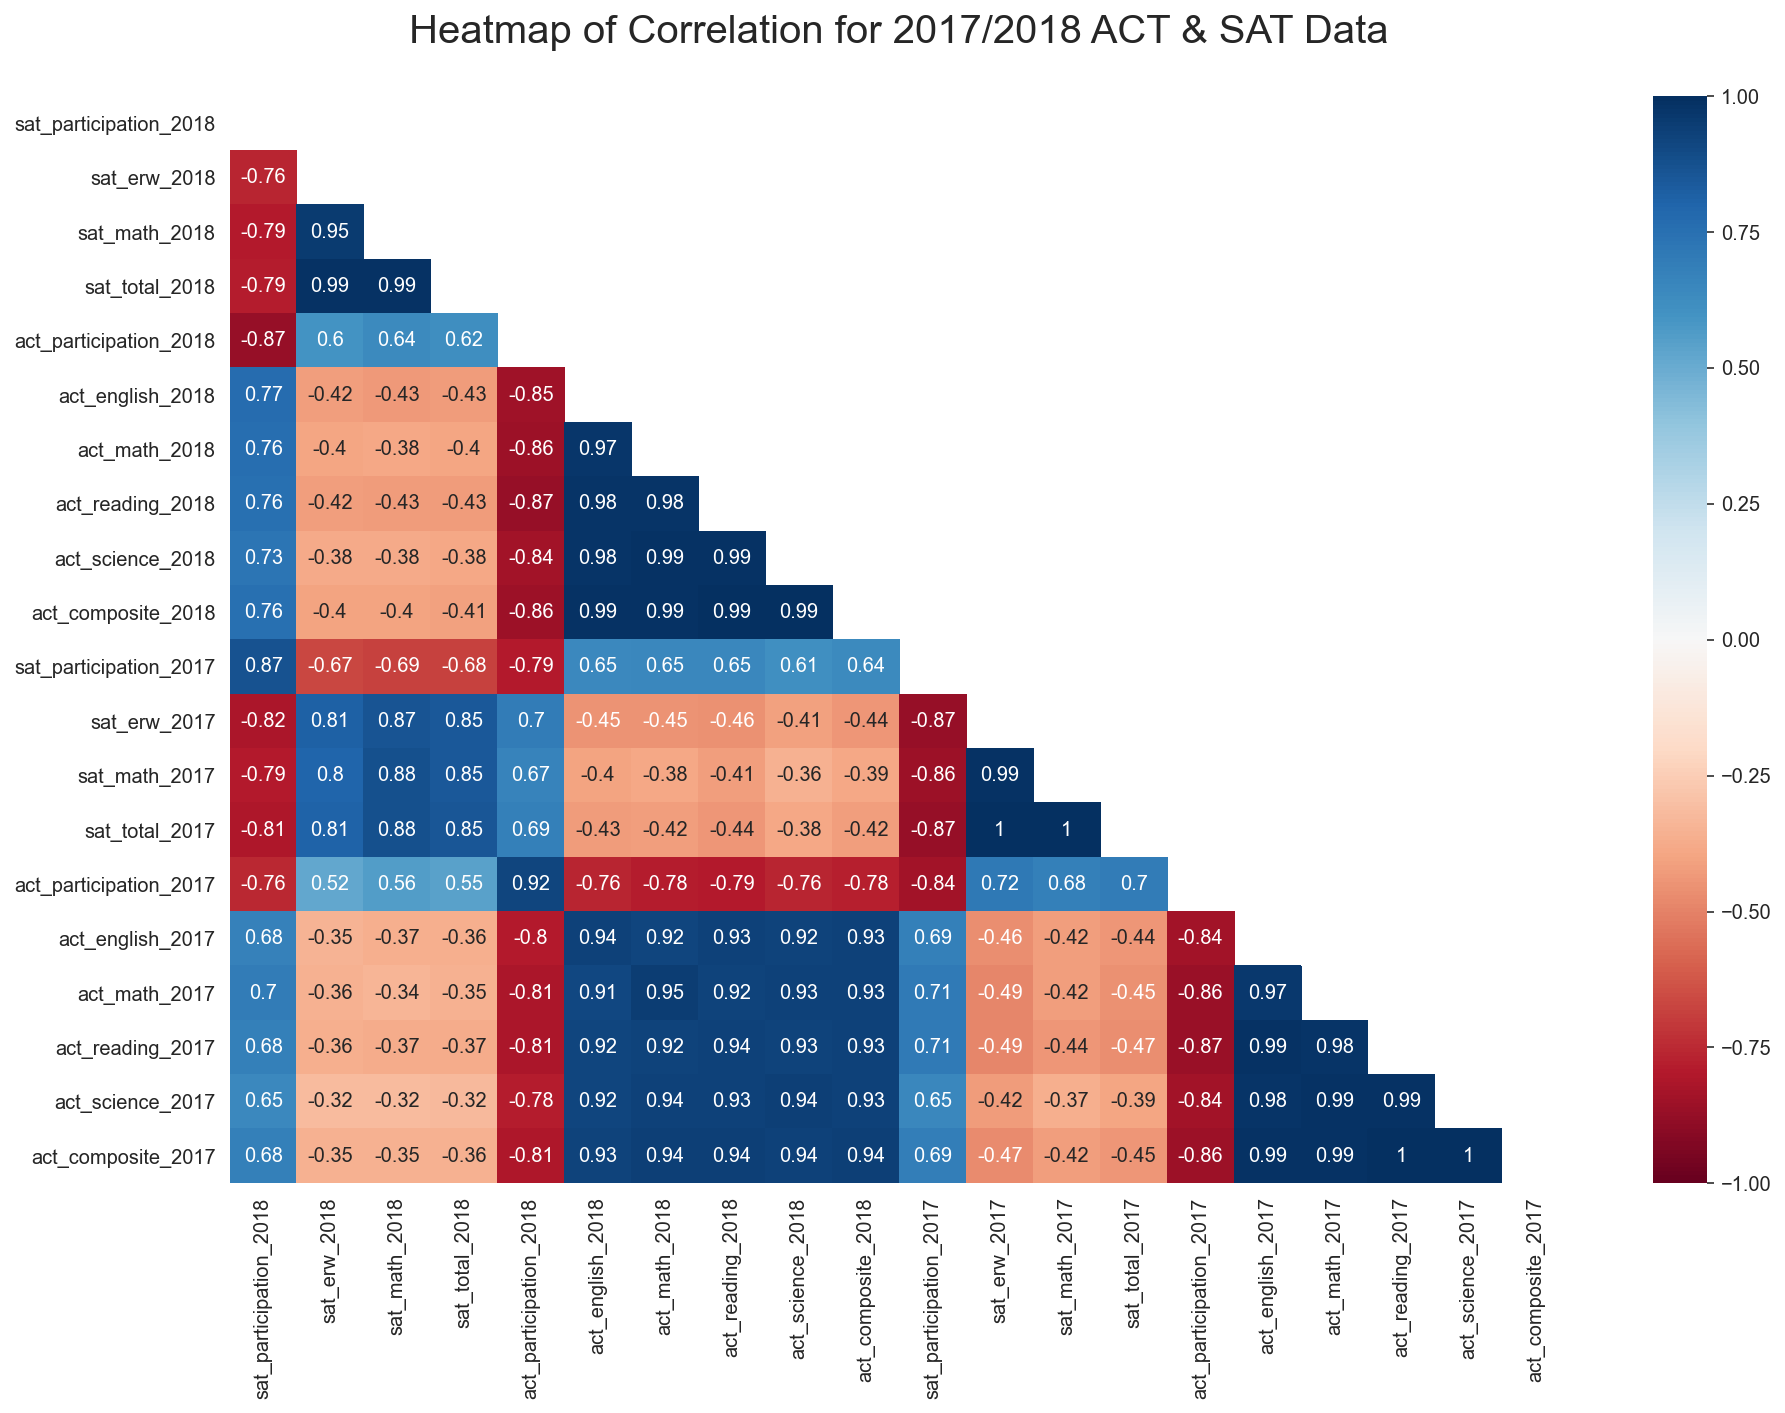

In [89]:
# Using a mask to hide half of the heatmap
# Generating heatmap with divergent colormap, easier to tell if positive or negative correlation
# Blue will mean high positive correlation while red will mean high negative correlation
mask_matrix = np.triu(final_df.corr())

plt.subplots(figsize=(15,10))
plt.title('Heatmap of Correlation for 2017/2018 ACT & SAT Data\n', fontsize=20)
sns.heatmap(final_df.corr(), annot=True, vmin=-1, vmax=1, cmap='RdBu', mask=mask_matrix, fmt='.2g');

**Observation:**  
For both the SAT and ACT, participation rate in 2017 has a high positive correlation (r >0.8) to the participation rate in 2018. This is expected since it is unlikely to have drastic change in the total number of test takers within a state from year-to-year unless there are changes in the state's education policies or other things which cause students to take or not take the tests.

The SAT participation rate has a high negative correlation (r <-0.8) to the ACT participation for both years. This is expected since it is unlikely that a student who took the SAT will still take the ACT. Moreover, the states which mandate their students to take up one of the tests would not offer the other test with the same means. Although, there may be exceptions where some students want to take up both tests, which may result in self-selection bias.

For both the SAT and ACT, mean scores of a subtest have a high positive correlation (r >0.8) to the means scores of the other subtests. This is likely the case since students who do well in one subtest are likely to do well in other subtests. 

For both the SAT and ACT, there is a seemingly high negative correlation (r <-0.7) between the participation rate and the means scores for the subtest for each year. This suggests that for a state with high SAT/ACT particiation rate, the students tend to have lower mean scores for the subtests. This phenomenon will be investigated further.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [90]:
sns.set_style('darkgrid')
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, main_title):
    nrows = int(np.ceil(len(list_of_columns)/2))   # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, nrows*5))   
    plt.subplots_adjust(hspace = 0.4)
    ax = ax.ravel()   # Ravel turns a matrix into a vector, which is easier to iterate
    color_dict = {'sat': 'deepskyblue', 'act': 'midnightblue'}   # Contains the colors for each test
    for i, column in enumerate(list_of_columns):   # Gives us an index value to get into all our lists
        c_val = color_dict[column.split('_')[0]]
        ax[i].set(title=list_of_titles[i], xlabel=list_of_xlabels[i])
        ax[i].hist(dataframe[column], bins=20, color=c_val, edgecolor='k', alpha=0.7)
        ax[i].axvline(x=dataframe[column].mean() , linewidth=2, color='k', linestyle='dashed')
        ax[i].axvline(x=dataframe[column].median() , linewidth=2, color='m', linestyle='dotted')
        
        min_ylim, max_ylim = ax[i].get_ylim()
        ax[i].text(x=dataframe[column].mean(), y=max_ylim*0.88, s='Mean', rotation=90, color='k')
        ax[i].text(x=dataframe[column].median(), y=max_ylim*0.85, s='Median', rotation=90, color='m')
    fig.suptitle(main_title, fontsize=25)
    plt.show();
    pass

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

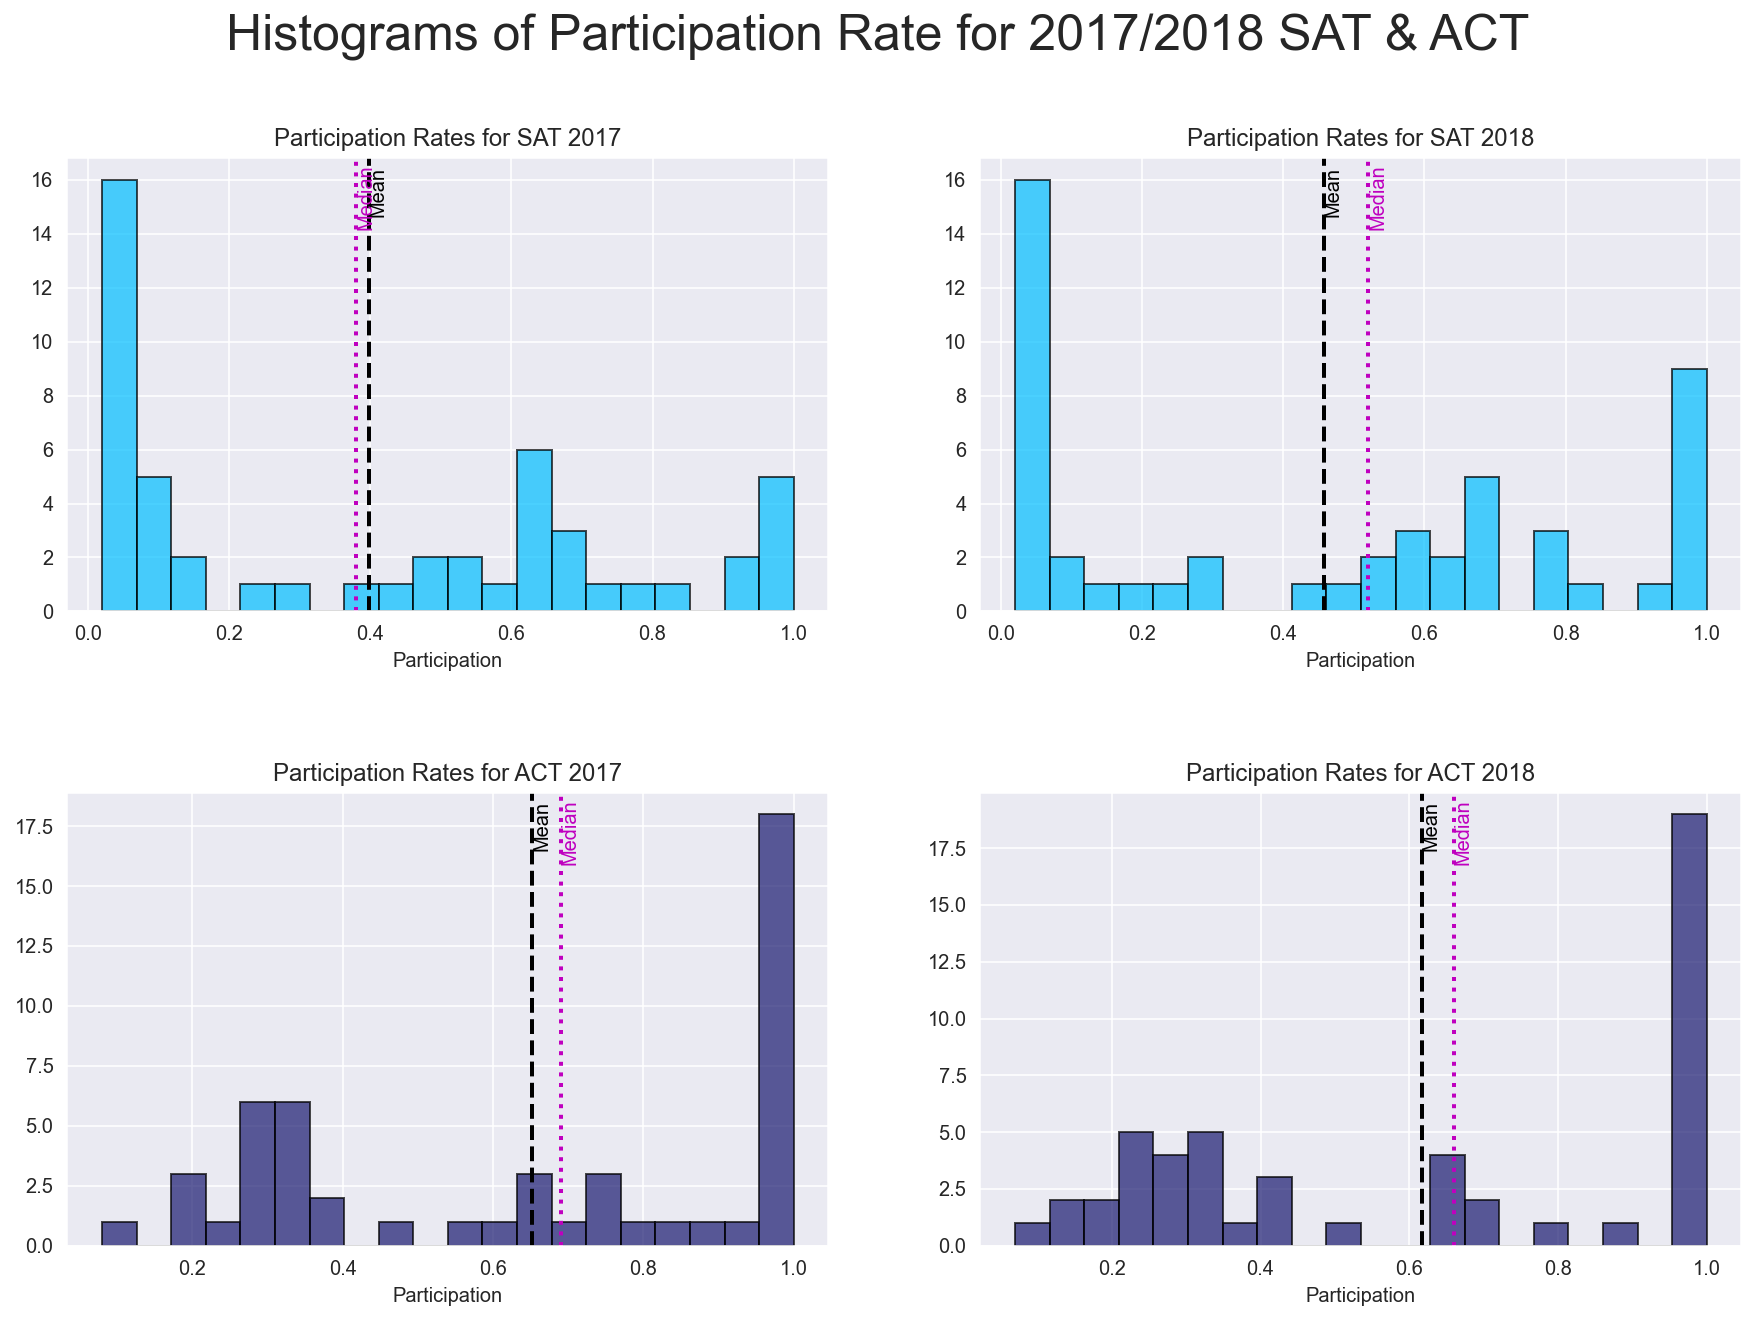

In [91]:
# Plot for participation rates for SAT & ACT
list_of_columns = ['sat_participation_2017', 'sat_participation_2018', 'act_participation_2017', 'act_participation_2018']
list_of_titles = ['Participation Rates for SAT 2017', 'Participation Rates for SAT 2018', 'Participation Rates for ACT 2017', 'Participation Rates for ACT 2018']
list_of_xlabels = ['Participation', 'Participation', 'Participation', 'Participation']
subplot_histograms(final_df, list_of_columns, list_of_titles, list_of_xlabels, 'Histograms of Participation Rate for 2017/2018 SAT & ACT')

**Observation:**  
* The distributions for both the SAT and ACT participation rates did not change significantly year-to-year.
* For the SAT, there is a large number of states with very low participation rates (<5%), a spread of states in the middle range and a group of states with 100% participation (more so in 2018).
* For the ACT, there is a very small number of states with low participation rate (<20%), a flatter spread of states in the middle range and a large number of states with 100% participation.  

The above observation suggests that the ACT is more successful than the SAT in terms of participation. The converse relationship is expected since students would normally sit for either the SAT or ACT. It also displays the strong negative correlation between the SAT and ACT participation rates shown by the scatter plots earlier.

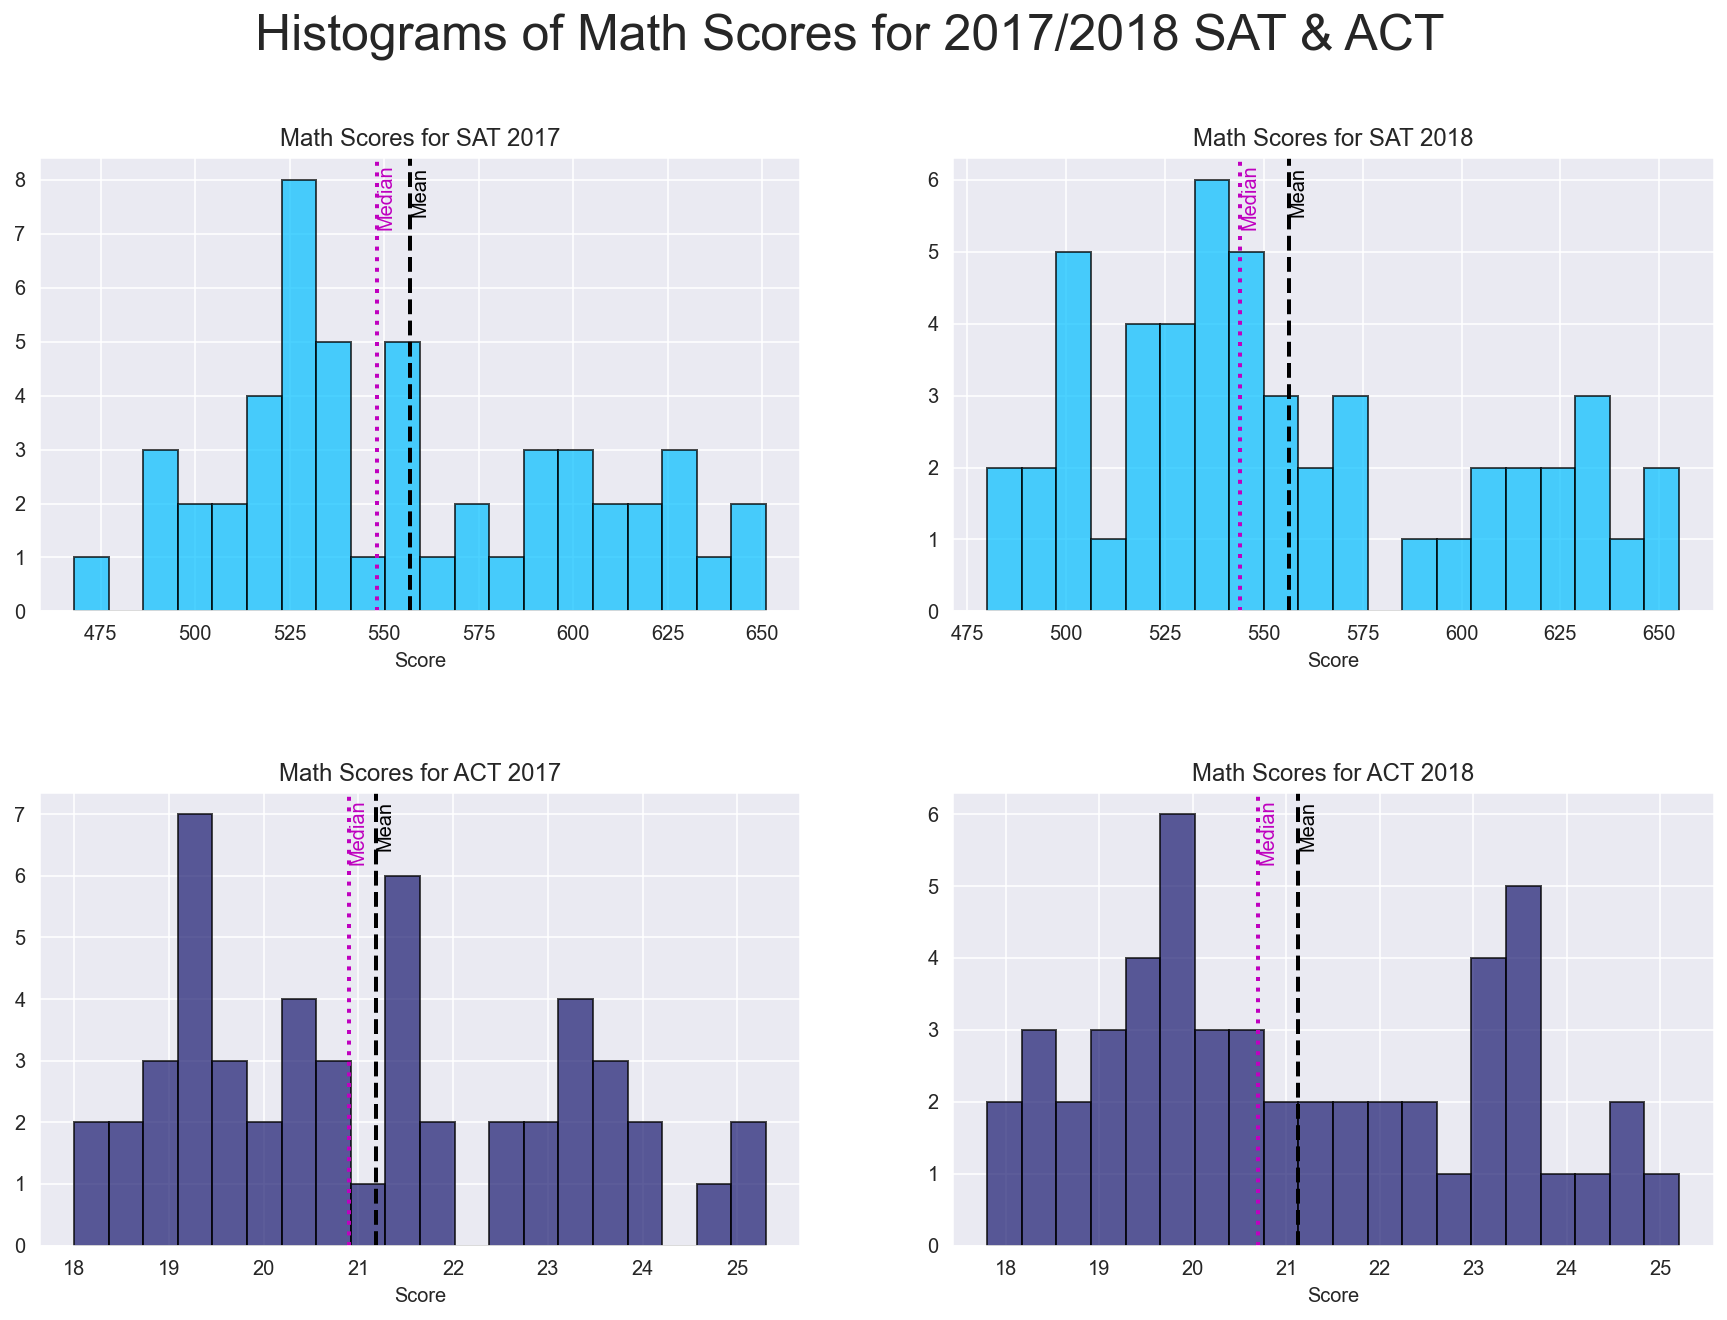

In [92]:
# Plot for math scores for SAT & ACT
list_of_columns = ['sat_math_2017', 'sat_math_2018', 'act_math_2017', 'act_math_2018']
list_of_titles = ['Math Scores for SAT 2017', 'Math Scores for SAT 2018', 'Math Scores for ACT 2017', 'Math Scores for ACT 2018']
list_of_xlabels = ['Score', 'Score', 'Score', 'Score']
subplot_histograms(final_df, list_of_columns, list_of_titles, list_of_xlabels, 'Histograms of Math Scores for 2017/2018 SAT & ACT')

In [93]:
print("For SAT Math 2017, there are {} states below average score.".format(final_df[final_df['sat_math_2017']<final_df['sat_math_2017'].mean()].count()[0]))
print("For SAT Math 2018, there are {} states below average score.".format(final_df[final_df['sat_math_2018']<final_df['sat_math_2018'].mean()].count()[0]))
print("For ACT Math 2017, there are {} states below average score.".format(final_df[final_df['act_math_2017']<final_df['act_math_2017'].mean()].count()[0]))
print("For ACT Math 2018, there are {} states below average score.".format(final_df[final_df['act_math_2018']<final_df['act_math_2018'].mean()].count()[0]))

For SAT Math 2017, there are 31 states below average score.
For SAT Math 2018, there are 32 states below average score.
For ACT Math 2017, there are 26 states below average score.
For ACT Math 2018, there are 28 states below average score.


**Observation:**  
For both SAT and ACT Math in the two years, we can see that the distributions are all right-skewed by observing the mean in relation to the median. The distributions for SAT Math for both years are not symmetrical about the mean since there are more states (31~32 states) residing on the left of the mean. Generally, we see spikes in the number of states on the left of the mean for SAT 2017 and SAT 2018. Similarly, the distribution for ACT Math 2018 is not symmetrical about the mean since there are more states (28 states) residing on the left of the mean. Although the distribution for ACT Math 2017 shows that there are about equal number of states on each side of the mean, the spike in number of states are nearer to the 1st quartile of the distribution, therefore it is not symmetrical. As for ACT Math 2018, we see two spikes in number of states, one on the left of the mean and one closer to the 3rd quartile of the distribution.

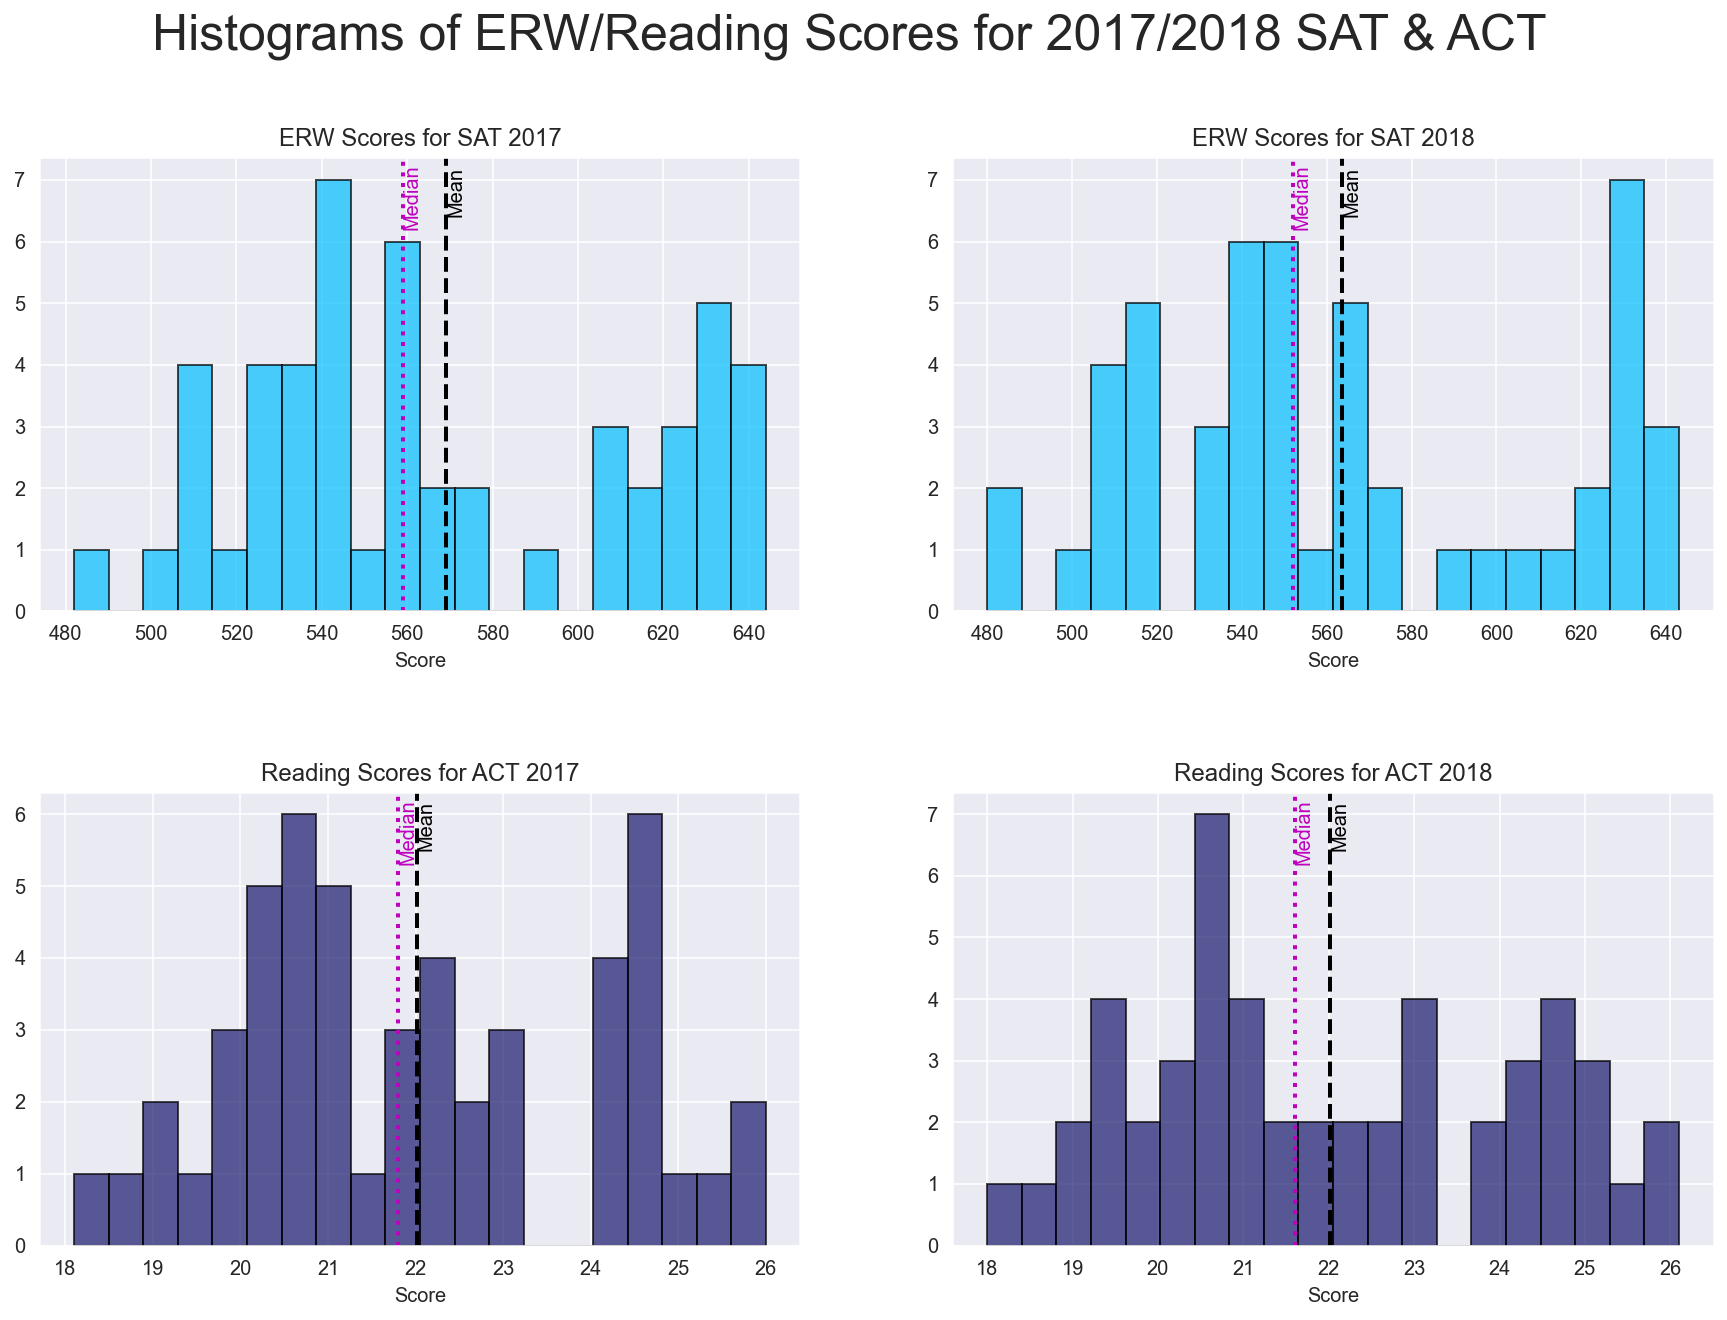

In [94]:
# Plot for reading/verbal scores for SAT & ACT
list_of_columns = ['sat_erw_2017', 'sat_erw_2018', 'act_reading_2017', 'act_reading_2018']
list_of_titles = ['ERW Scores for SAT 2017', 'ERW Scores for SAT 2018', 'Reading Scores for ACT 2017', 'Reading Scores for ACT 2018']
list_of_xlabels = ['Score', 'Score', 'Score', 'Score']
subplot_histograms(final_df, list_of_columns, list_of_titles, list_of_xlabels, 'Histograms of ERW/Reading Scores for 2017/2018 SAT & ACT')

In [95]:
print("For SAT ERW 2017, there are {} states below average score.".format(final_df[final_df['sat_erw_2017']<final_df['sat_erw_2017'].mean()].count()[0]))
print("For SAT ERW 2018, there are {} states below average score.".format(final_df[final_df['sat_erw_2018']<final_df['sat_erw_2018'].mean()].count()[0]))
print("For ACT Reading 2017, there are {} states below average score.".format(final_df[final_df['act_reading_2017']<final_df['act_reading_2017'].mean()].count()[0]))
print("For ACT Reading 2018, there are {} states below average score.".format(final_df[final_df['act_reading_2018']<final_df['act_reading_2018'].mean()].count()[0]))

For SAT ERW 2017, there are 31 states below average score.
For SAT ERW 2018, there are 30 states below average score.
For ACT Reading 2017, there are 28 states below average score.
For ACT Reading 2018, there are 28 states below average score.


**Observation:**  
For both SAT and ACT ERW/Reading in the two years, we can see that the distributions are all right-skewed by observing the mean in relation to the median. The distributions for SAT ERW for both years are not symmetrical about the mean since there are more states (30~31 states) residing on the left of the mean. Generally, we see spikes in the number of states on the left and right of the mean for SAT 2017 and SAT 2018 respectively. Similarly, the distribution for ACT Reading for both years are not symmetrical about the mean since there are more states (28 states) residing on the left of the mean. Furthermore, we see two spikes in number of states for ACT Reading 2017, one on the left of the mean and one closer to the 3rd quartile of the distribution. As for ACT Reading 2018, we see one spike in number of states on the left of the mean.

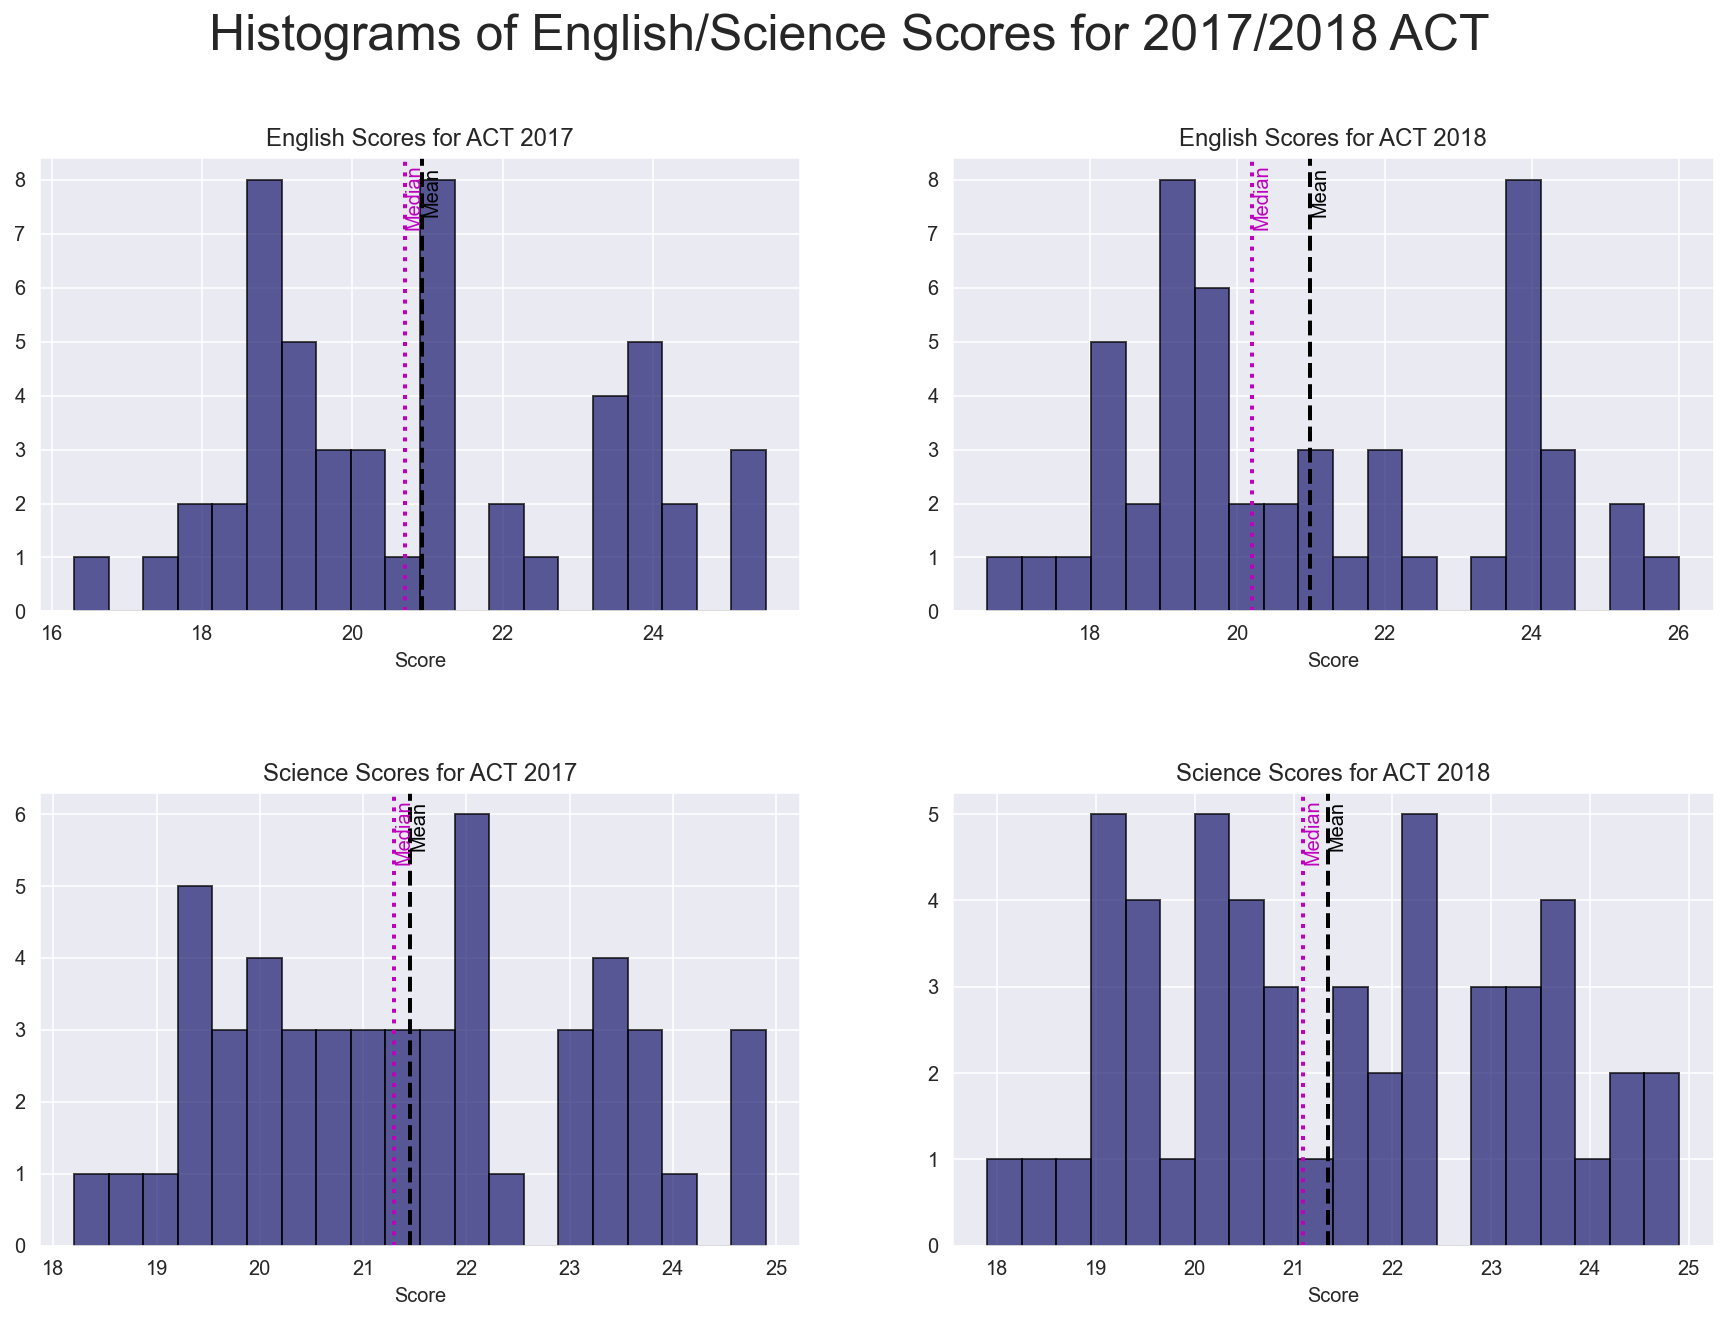

In [96]:
# Plot for english & science scores for ACT
list_of_columns = ['act_english_2017', 'act_english_2018', 'act_science_2017', 'act_science_2018']
list_of_titles = ['English Scores for ACT 2017', 'English Scores for ACT 2018', 'Science Scores for ACT 2017', 'Science Scores for ACT 2018']
list_of_xlabels = ['Score', 'Score', 'Score', 'Score']
subplot_histograms(final_df, list_of_columns, list_of_titles, list_of_xlabels, 'Histograms of English/Science Scores for 2017/2018 ACT')

In [97]:
print("For ACT English 2017, there are {} states below average score.".format(final_df[final_df['act_english_2017']<final_df['act_english_2017'].mean()].count()[0]))
print("For ACT English 2018, there are {} states below average score.".format(final_df[final_df['act_english_2018']<final_df['act_english_2018'].mean()].count()[0]))
print("For ACT Science 2017, there are {} states below average score.".format(final_df[final_df['act_science_2017']<final_df['act_science_2017'].mean()].count()[0]))
print("For ACT Science 2018, there are {} states below average score.".format(final_df[final_df['act_science_2018']<final_df['act_science_2018'].mean()].count()[0]))

For ACT English 2017, there are 28 states below average score.
For ACT English 2018, there are 29 states below average score.
For ACT Science 2017, there are 26 states below average score.
For ACT Science 2018, there are 26 states below average score.


**Observation:**  
For both ACT English and Science in the two years, we can see that the distributions are all right-skewed by observing the mean in relation to the median. The distributions for ACT English for both years are not symmetrical about the mean since there are more states (28~29 states) residing on the left of the mean. For ACT English 2017, we see two spikes in number of states, one near to the 1st quartile of the distribution and one close to the mean. For ACT English 2018, we see two spikes in number of states near the 1st and 3rd quartile of the distribution. Although the distributions for ACT Science in both years show that there are about equal number of states on each side of the mean, the distributions are not symmetrical. for ACT Science 2017, there are two notable spikes in number of states, one near the 1st quartile of the distribution and one on the right of the mean. As for ACT Science 2018, we can see three spikes in number of states, two on the left of the mean and one on the right of the mean.

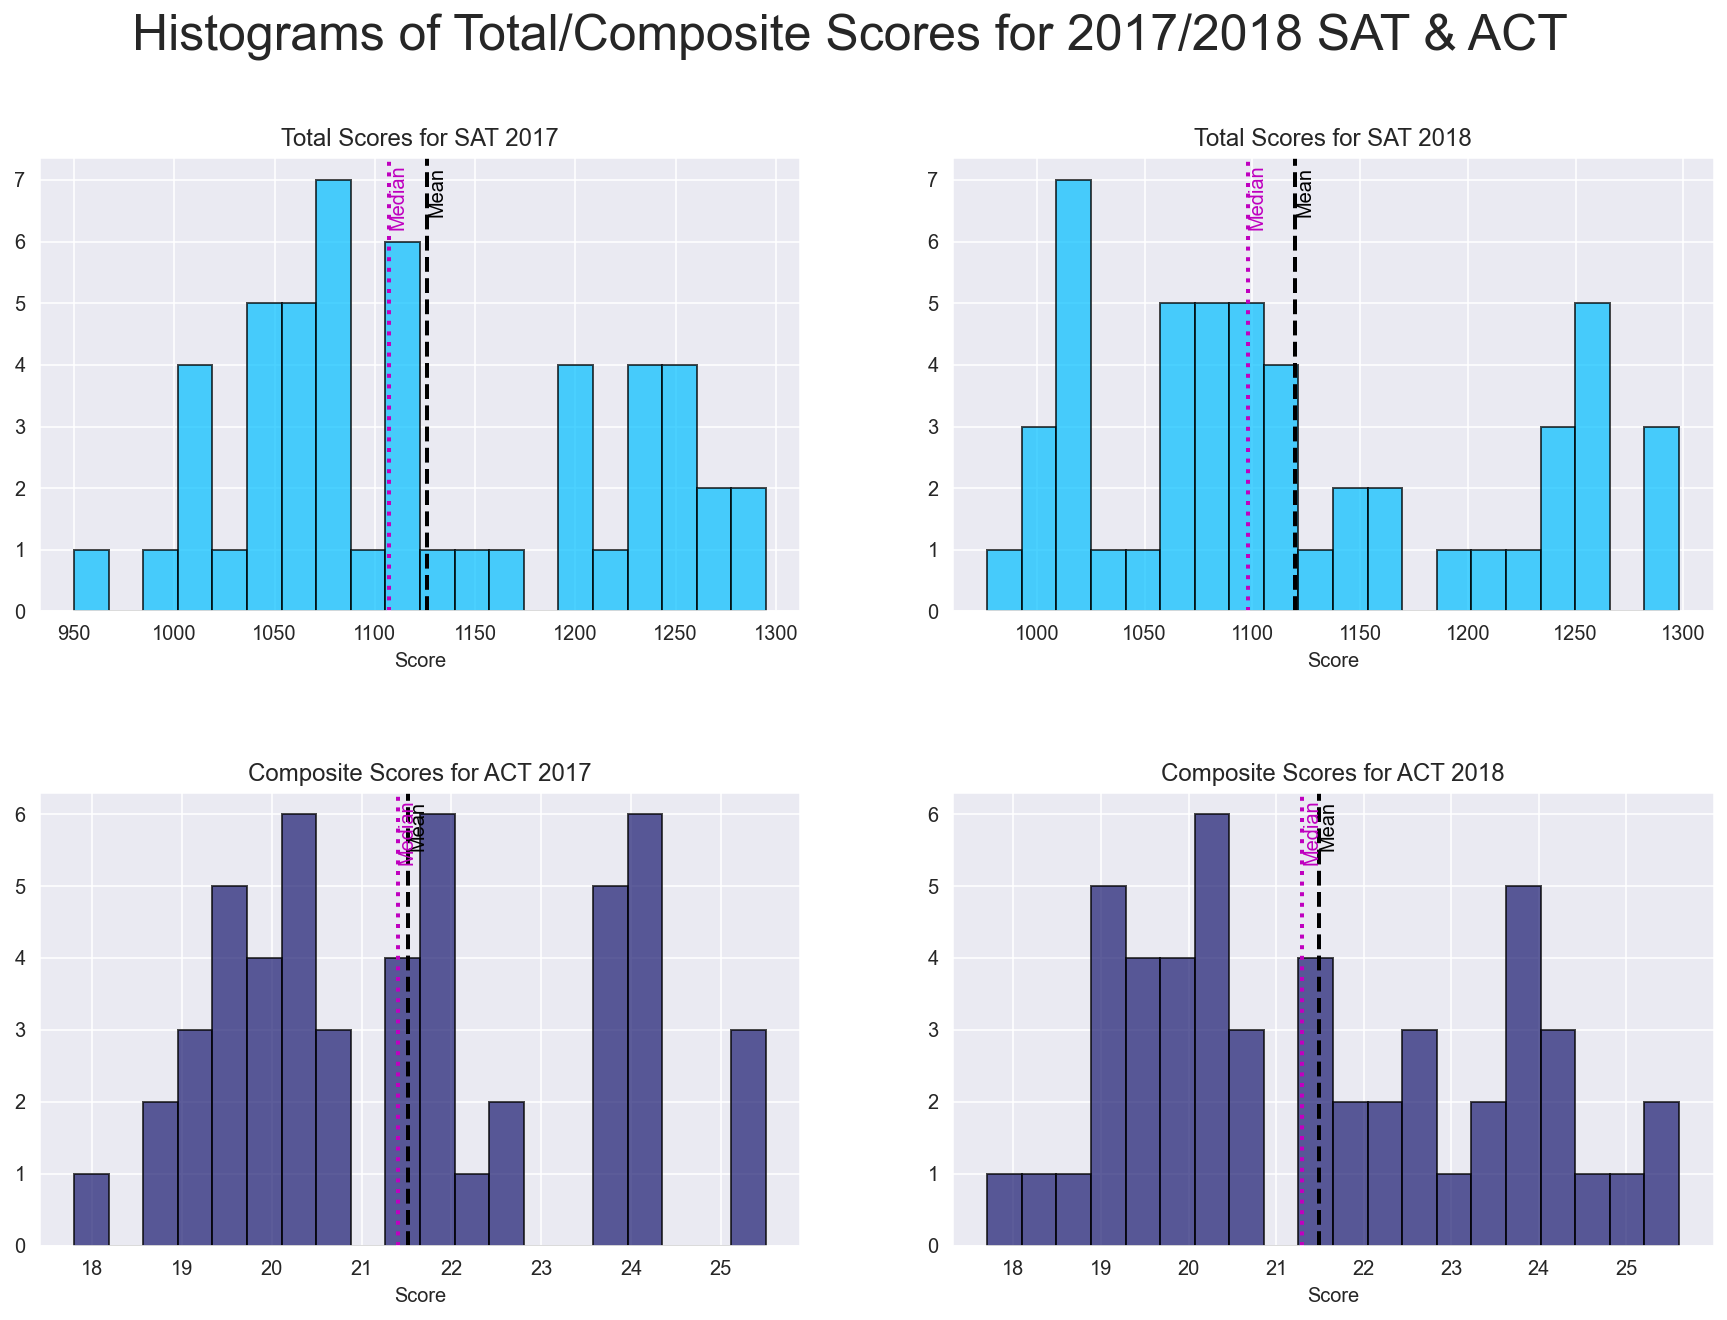

In [98]:
# Plot for total/composite scores for SAT & ACT
list_of_columns = ['sat_total_2017', 'sat_total_2018', 'act_composite_2017', 'act_composite_2018']
list_of_titles = ['Total Scores for SAT 2017', 'Total Scores for SAT 2018', 'Composite Scores for ACT 2017', 'Composite Scores for ACT 2018']
list_of_xlabels = ['Score', 'Score', 'Score', 'Score']
subplot_histograms(final_df, list_of_columns, list_of_titles, list_of_xlabels, 'Histograms of Total/Composite Scores for 2017/2018 SAT & ACT')

In [99]:
print("For SAT 2017, there are {} states below average total score.".format(final_df[final_df['sat_total_2017']<final_df['sat_total_2017'].mean()].count()[0]))
print("For SAT 2018, there are {} states below average total score.".format(final_df[final_df['sat_total_2018']<final_df['sat_total_2018'].mean()].count()[0]))
print("For ACT 2017, there are {} states below average composite score.".format(final_df[final_df['act_composite_2017']<final_df['act_composite_2017'].mean()].count()[0]))
print("For ACT 2018, there are {} states below average composite score.".format(final_df[final_df['act_composite_2018']<final_df['act_composite_2018'].mean()].count()[0]))

For SAT 2017, there are 31 states below average total score.
For SAT 2018, there are 32 states below average total score.
For ACT 2017, there are 28 states below average composite score.
For ACT 2018, there are 28 states below average composite score.


**Observation:**  
For both SAT and ACT Total/Composite in the two years, we can see that the distributions are all right-skewed by observing the mean in relation to the median. The distributions for SAT Total for both years are not symmetrical about the mean since there are more states (31~32 states) residing on the left of the mean. For SAT Total 2017 and 2018, we see spikes in number of states on the left of the mean. Similarly, the distributions for ACT Composite for both years are not symmetrical about the mean since there are more states (28 states) residing on the left of the mean. For ACT Composite 2017, we can see three spikes in number of states, one on the left of the mean, one close to the mean, and one close to the 3rd quartile of the distribution. As for ACT Composite 2018, we can see three spikes in number of states, two on the left of the mean and one closer to the 3rd quartile of the distribution.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [100]:
# Function to create scatter subplot
# list_of_xycolumns takes in a list with each item being [x,y] 
def subplot_scatter(dataframe, list_of_xycolumns, list_of_titles):
    nrows = int(np.ceil(len(list_of_xycolumns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, nrows*5))   
    plt.subplots_adjust(hspace = 0.4)
    ax = ax.ravel()   # Ravel turns a matrix into a vector, which is easier to iterate
    #color_dict = {'sat': 'deepskyblue', 'act': 'midnightblue'}   # Contains the colors for each test
        
    for i, xycolumn in enumerate(list_of_xycolumns):   # Gives us an index value to get into all our lists
        #c_val = color_dict[xycolumn[0].split('_')[0]]
        #ax[i].set(xlabel=list_of_xylabels[i][0], ylabel=list_of_xylabels[i][1])
        ax[i].set_title(list_of_titles[i], fontsize=15)
        #ax[i].scatter(dataframe[xycolumn[0]], dataframe[xycolumn[1]]) 
        sns.regplot(x=dataframe[xycolumn[0]], y=dataframe[xycolumn[1]], ax=ax[i])
    
    # This code below is to switch off the axes if there is an odd number of subplots
    for axes in ax.flat[len(list_of_xycolumns):]:
        axes.axis('off')
    #plt.show();
    pass

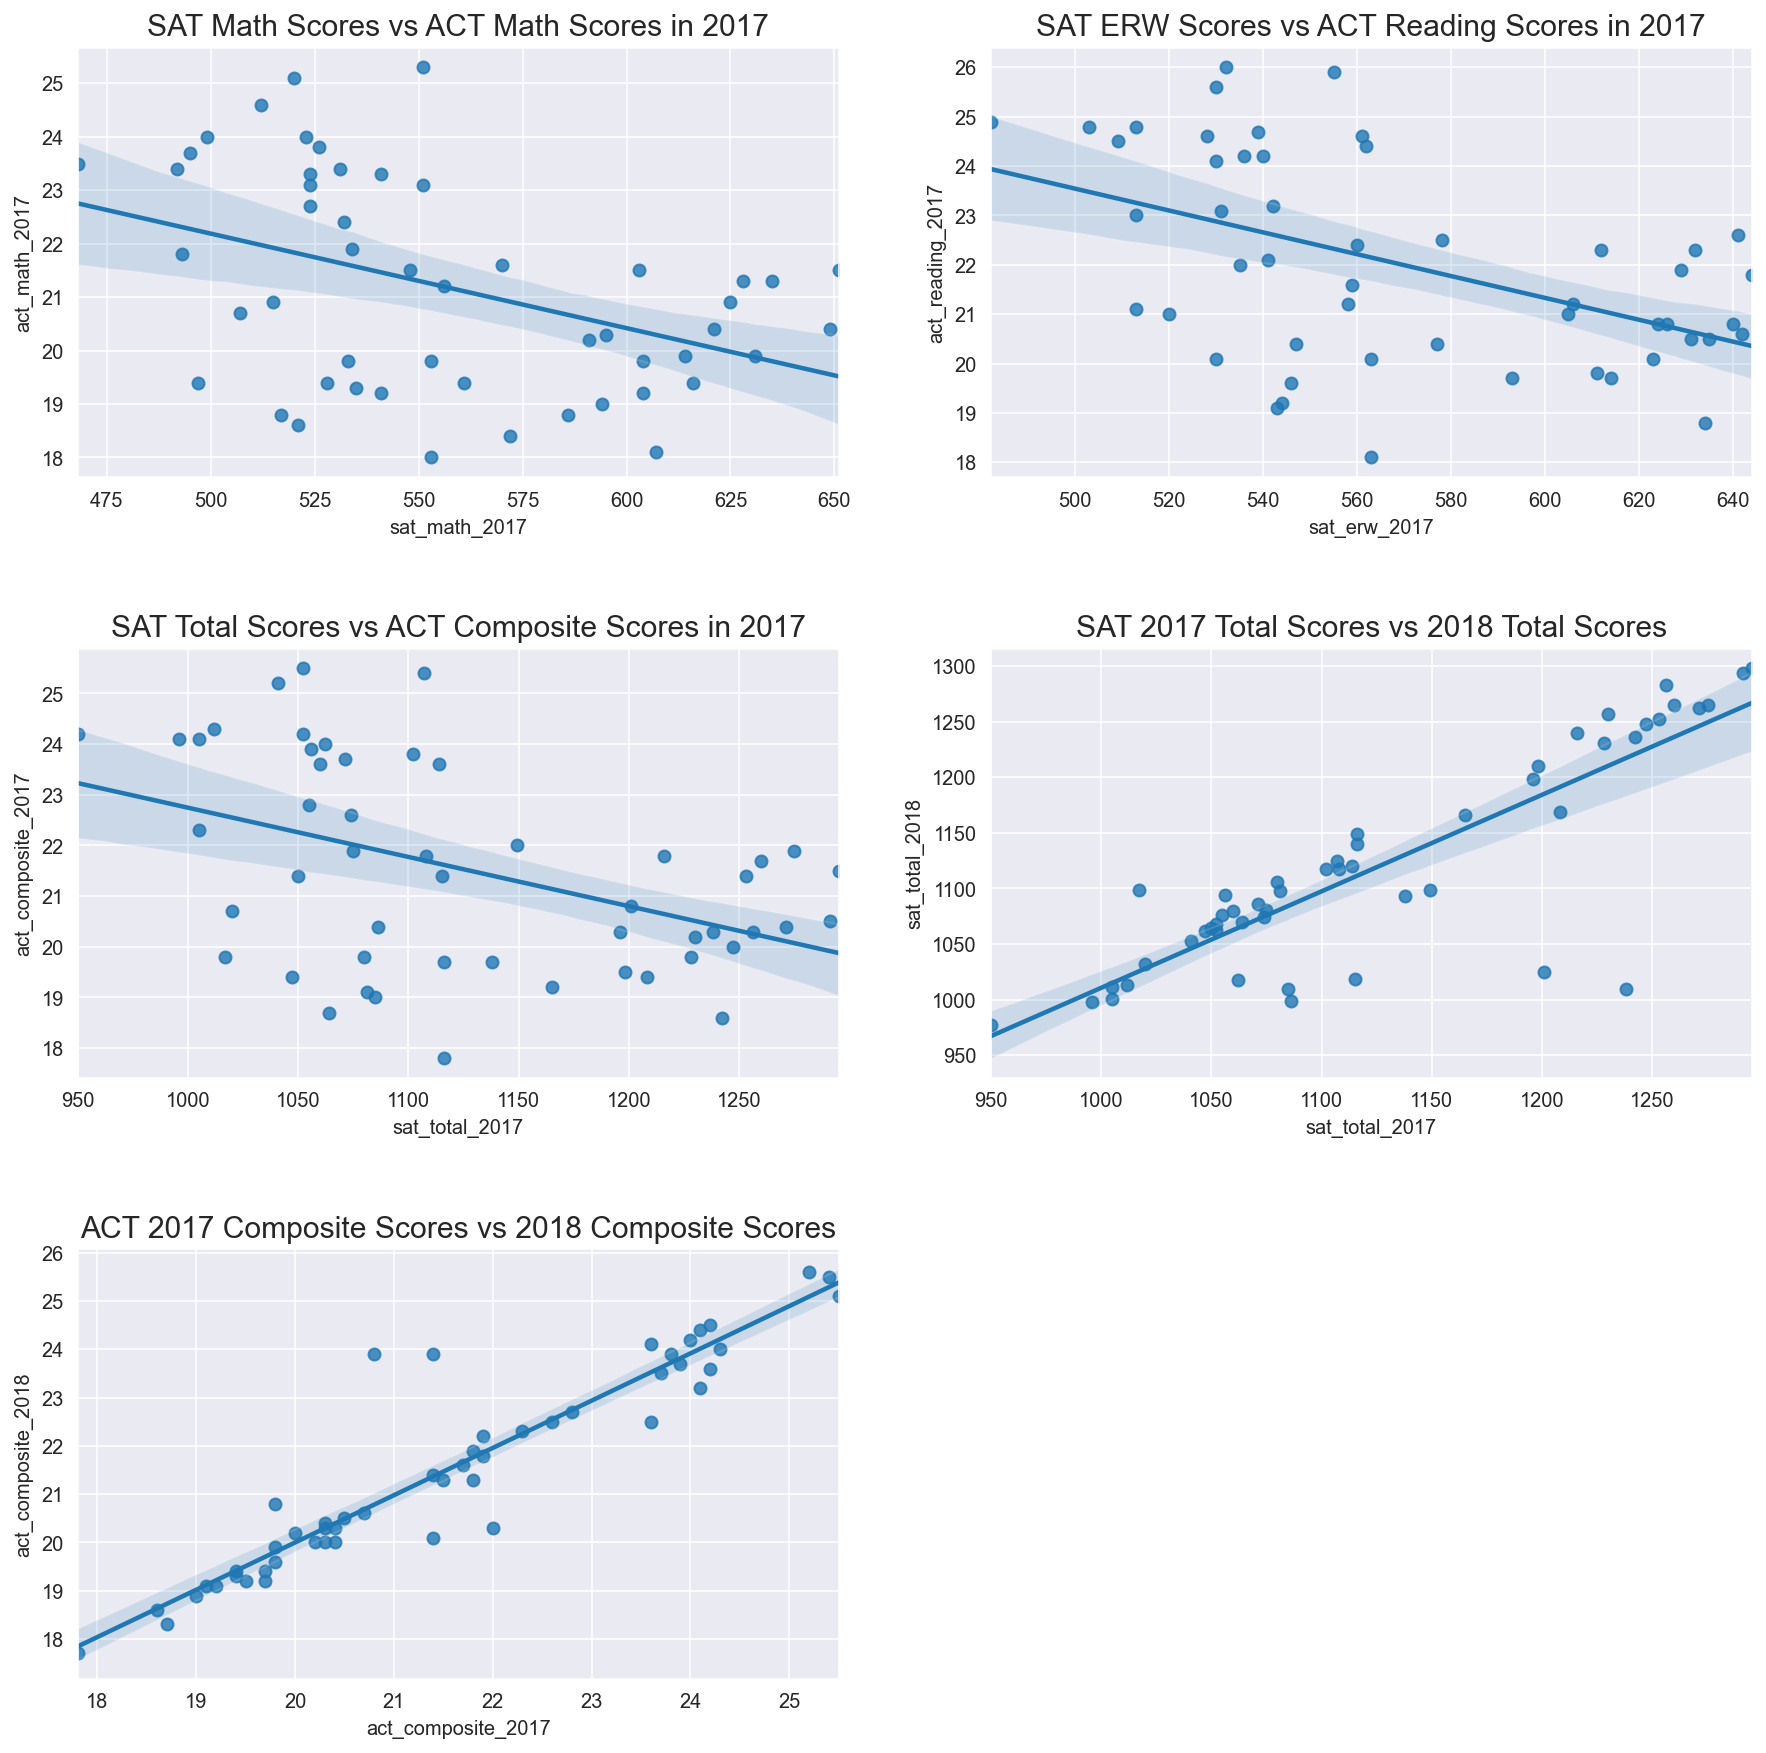

In [101]:
# Subplot for scores of SAT & ACT
list_of_xycolumns = [['sat_math_2017', 'act_math_2017'],
                    ['sat_erw_2017', 'act_reading_2017'],
                    ['sat_total_2017', 'act_composite_2017'],
                    ['sat_total_2017', 'sat_total_2018'],
                    ['act_composite_2017', 'act_composite_2018']]
list_of_titles = ['SAT Math Scores vs ACT Math Scores in 2017',
                  'SAT ERW Scores vs ACT Reading Scores in 2017',
                  'SAT Total Scores vs ACT Composite Scores in 2017',
                  'SAT 2017 Total Scores vs 2018 Total Scores',
                  'ACT 2017 Composite Scores vs 2018 Composite Scores']
subplot_scatter(final_df, list_of_xycolumns, list_of_titles)

In [102]:
final_df.loc[[5, 13], ['state', 'sat_participation_2017', 'sat_participation_2018', 'sat_total_2017', 'sat_total_2018',
                      'act_participation_2017', 'act_participation_2018', 'act_composite_2017', 'act_composite_2018']]

,state,sat_participation_2017,sat_participation_2018,sat_total_2017,sat_total_2018,act_participation_2017,act_participation_2018,act_composite_2017,act_composite_2018
5,Colorado,0.11,1.00,1201,1025,1.00,0.30,20.8,23.9
13,Illinois,0.09,0.99,1115,1019,0.93,0.43,21.4,23.9


**Observation:**  
* There is a seemingly strong positive correlation between the SAT 2017 Total Scores and the SAT 2018 Total Scores.
* There is a seemingly strong positive correlation between the ACT 2017 Composite Scores and the ACT 2018 Composite Scores.

We would expect a strong positive correlation between the SAT and ACT Total/Composite scores year-to-year. However, there are some outliers from the two scatter plots of Total/Composite scores above. Colorado and Illinois were two states which had the highest increase in SAT participation from 2017 to 2018, which we later found that it is likely due to these states making the SAT a mandatory requirement in 2018. Further investigation reveals that these two states are part of the outliers found in the scatter plots above. This suggests that the large change in SAT and ACT participation rates for these two states year-to-year may have affected the significant change in the mean total/composite score. It is probable that because significantly more students participated in SAT 2018 than SAT 2017, the mean total score for SAT 2018 was brought down significantly. This is likely due to the effects of **self-selection bias** where the smaller number of students who were participating in the SAT 2017 were better performers as they chose to take the test on their own accord when there were no mandatory requirements to do so.  

* There is a weak correlation between the SAT 2017 Math Scores and the ACT 2017 Math Scores.
* There is a weak correlation between the SAT 2017 ERW Scores and the ACT 2017 Reading Scores.
* There is a weak correlation between the SAT 2017 Total Scores and the ACT 2017 Composite Scores.

We would expect a weak correlation between the SAT test scores and ACT test scores since they are primarily different tests. Even comparing between a similar subject type such as Math between the SAT and ACT, the two tests have different scoring systems and were set in different formats. It is different to see that the test score of one test would be correlated to the test score of the other test.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

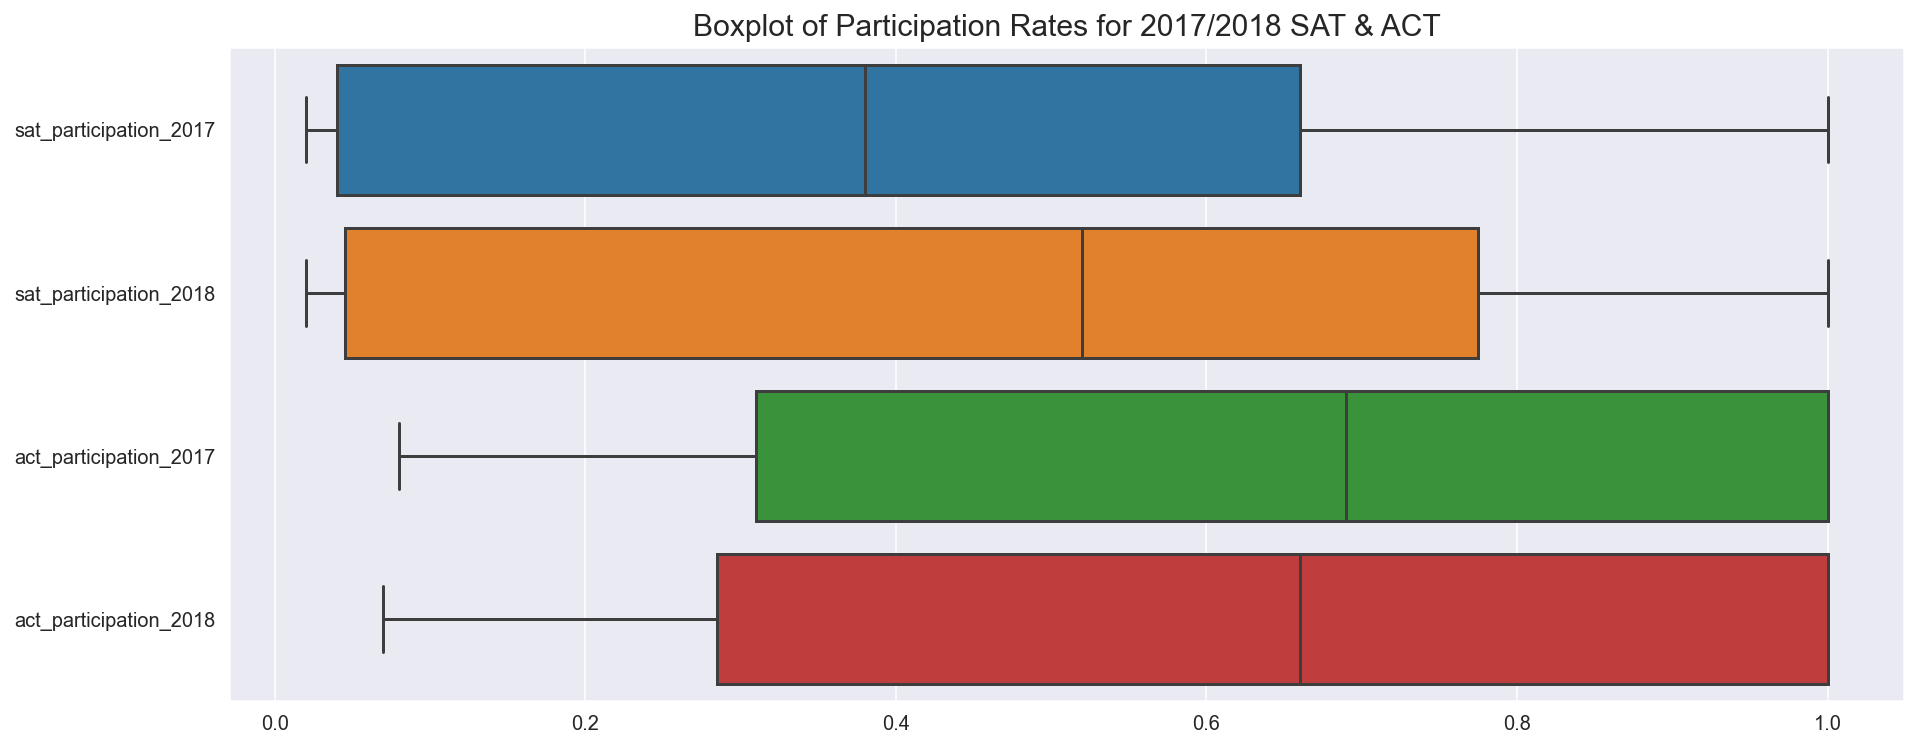

In [103]:
fig, ax = plt.subplots(figsize=(15, 6))

# Boxplot of participation rates for 2017/2018 SAT & ACT
sns.boxplot(data=final_df[['sat_participation_2017', 'sat_participation_2018', 'act_participation_2017', 'act_participation_2018']],
           orient='h')
ax.set_title('Boxplot of Participation Rates for 2017/2018 SAT & ACT', fontsize=15)
plt.show();

**Observation:**  
* From the boxplots, we did not manage to see any outliers of the data.
* For both years 2017 and 2018, the ACT participation rate are distributed within a significantly higher range than that of the SAT participation rate.
* For both years, the interquartile range of the ACT participation rates span over a higher range of participation (0.3-1.0) as compared to that of the SAT participation rates (0.05-0.7). This suggests that the ACT has been performing better than the SAT in terms of participation rates of the U.S. states.

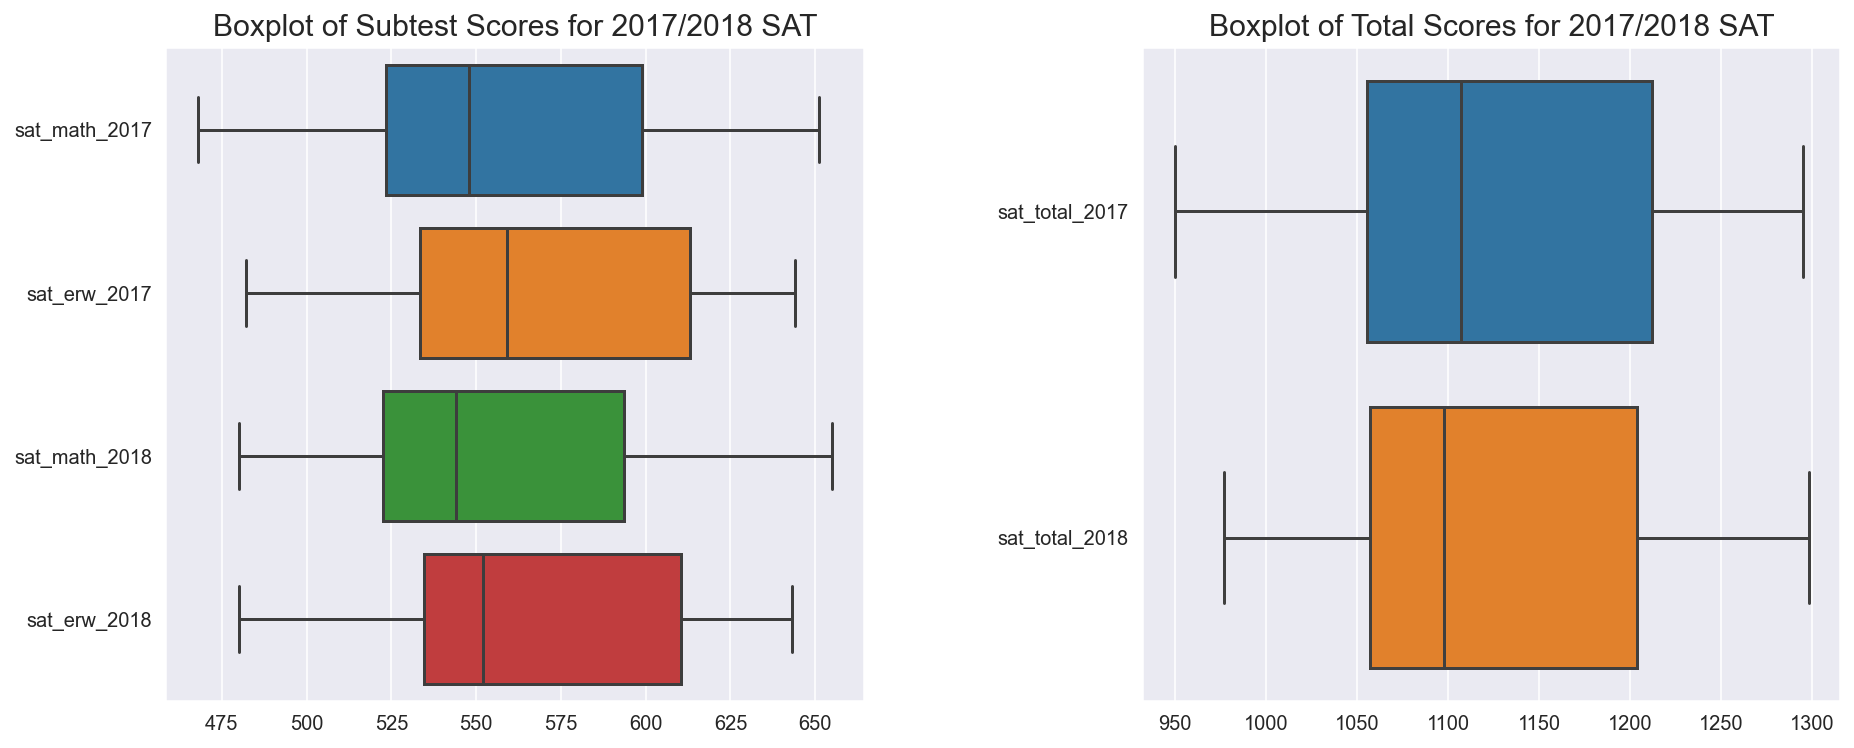

In [104]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))   
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

# Boxplot of Subtest scores for 2017/2018 SAT
sns.boxplot(data=final_df[['sat_math_2017', 'sat_erw_2017', 'sat_math_2018', 'sat_erw_2018']],
           ax=ax[0], orient='h')
ax[0].set_title('Boxplot of Subtest Scores for 2017/2018 SAT', fontsize=15)

# Boxplot of Total scores for 2017/2018 SAT
sns.boxplot(data=final_df[['sat_total_2017', 'sat_total_2018']],
           ax=ax[1], orient='h')
ax[1].set_title('Boxplot of Total Scores for 2017/2018 SAT', fontsize=15)

plt.show();

**Observation:**  
* From the boxplots, we did not manage to see any outliers of the data.
* For both years 2017 and 2018, the interquartile range of the SAT Math Scores spans over a lower range than that of the SAT ERW Scores. This may suggest that students have the tendency to perform worse in Math for the SAT.
* The 50th percentile for the SAT Total Scores is higher in 2017 as compared to 2018.
* The interquartile range of the SAT Total Scores is slightly wider in 2017 as compared to 2018.

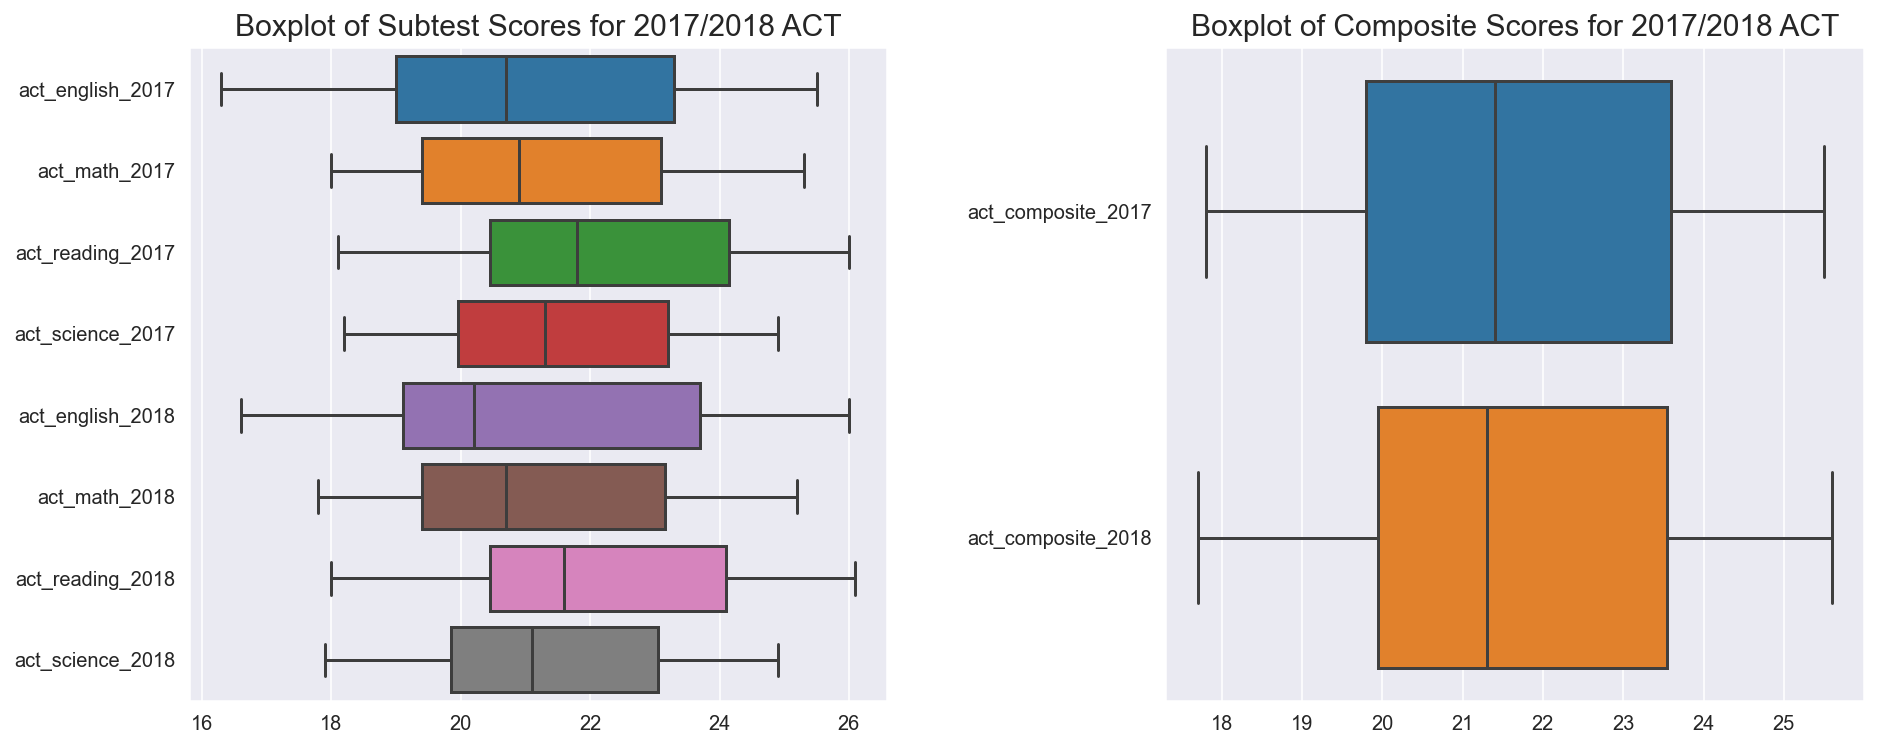

In [105]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))   
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

# Boxplot of Subtest scores for 2017/2018 ACT
sns.boxplot(data=final_df[['act_english_2017', 'act_math_2017', 'act_reading_2017', 'act_science_2017',
                           'act_english_2018', 'act_math_2018', 'act_reading_2018', 'act_science_2018']],
           ax=ax[0], orient='h')
ax[0].set_title('Boxplot of Subtest Scores for 2017/2018 ACT', fontsize=15)

# Boxplot of Composite scores for 2017/2018 ACT
sns.boxplot(data=final_df[['act_composite_2017', 'act_composite_2018']],
           ax=ax[1], orient='h')
ax[1].set_title('Boxplot of Composite Scores for 2017/2018 ACT', fontsize=15)

plt.show();

**Observation:**  
* From the boxplots, we did not manage to see any outliers of the data.
* For both years 2017 and 2018, the 50th percentile for the ACT English Scores are lower than that of the other subtest scores. This may suggest that students have the tendency to score worse in English than the other subtests for the ACT.
* The 50th percentile for the ACT Composite Scores is almost the same for both years 2017 and 2018.
* The interquartile range of the ACT Composite Scores is almost the same for both years 2017 and 2018. This suggests that students taking the ACT perform consistently year-to-year.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

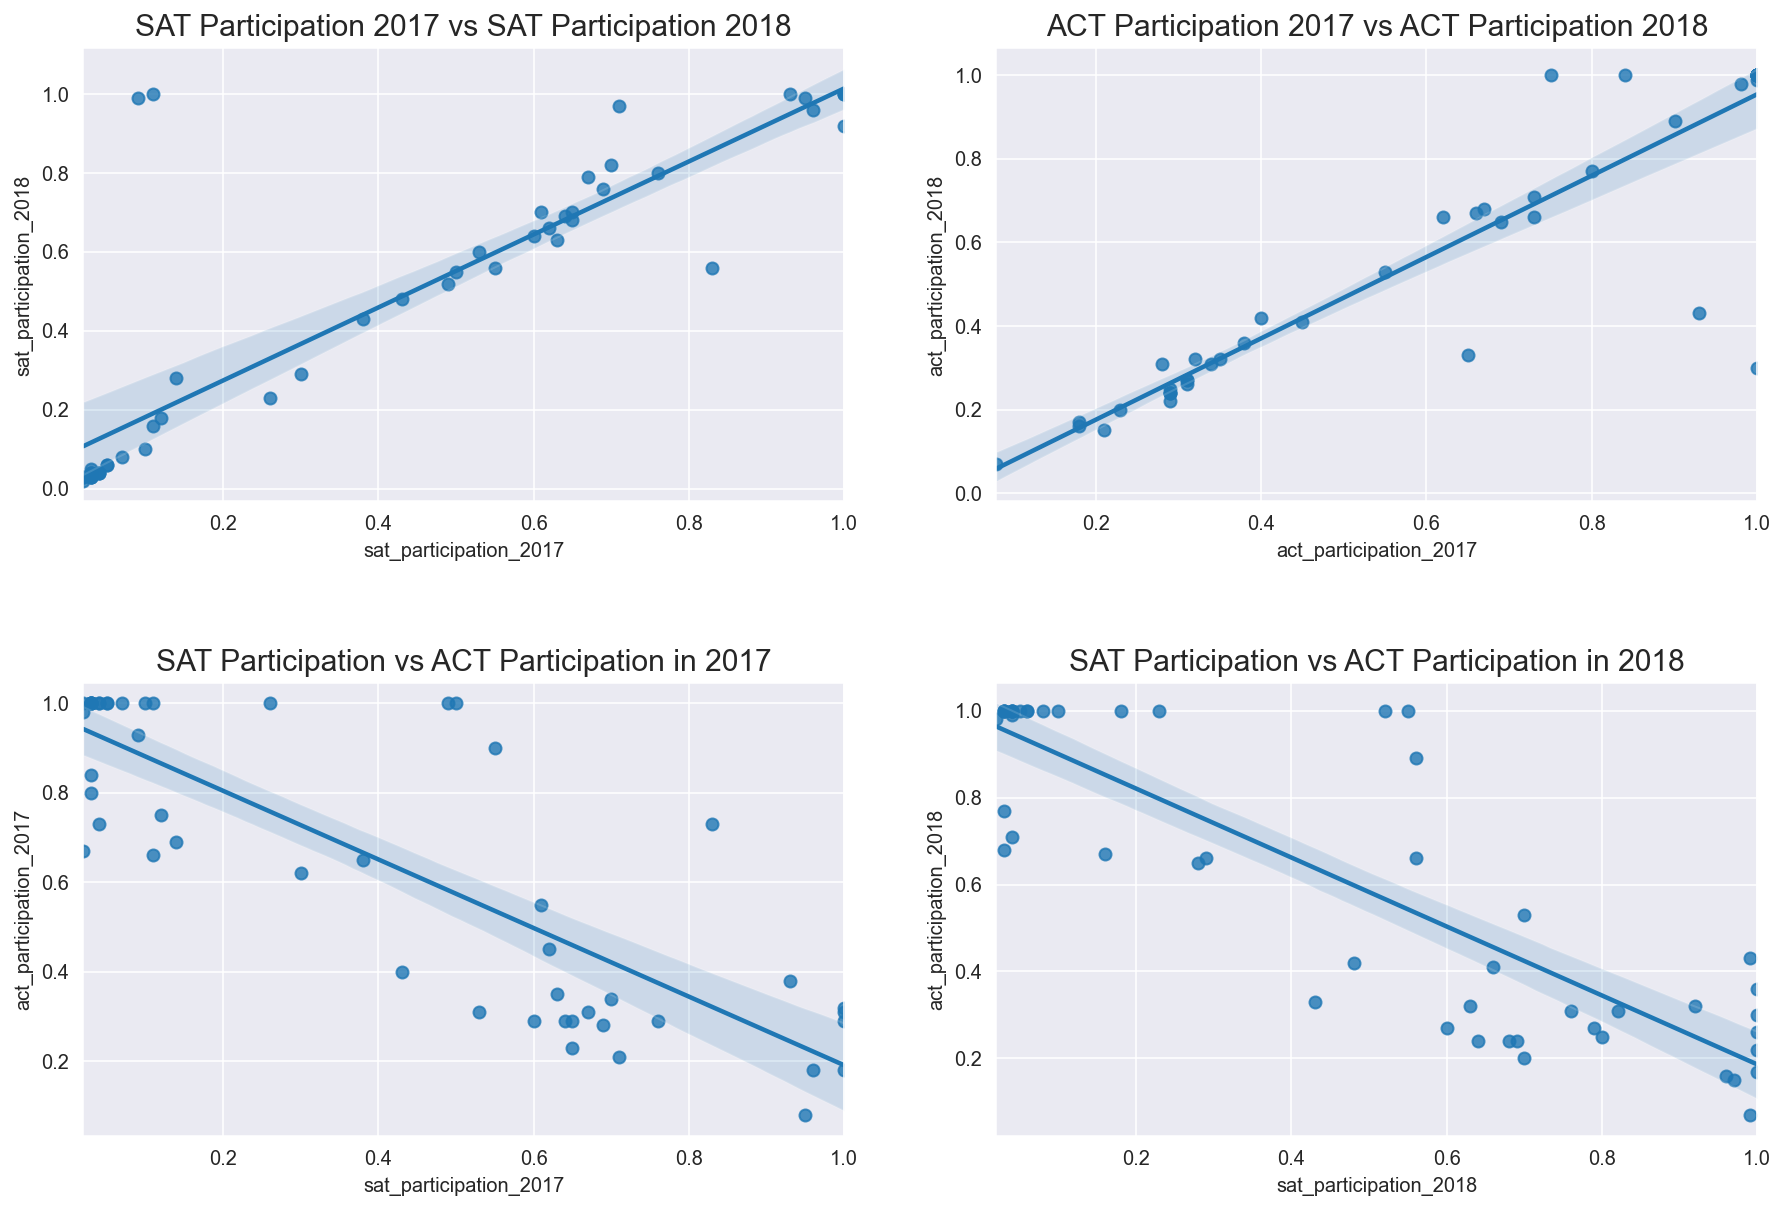

In [106]:
# Subplot for SAT & ACT participation rates
list_of_xycolumns = [['sat_participation_2017', 'sat_participation_2018'],
                    ['act_participation_2017', 'act_participation_2018'],
                    ['sat_participation_2017', 'act_participation_2017'],
                    ['sat_participation_2018', 'act_participation_2018']]
list_of_titles = ['SAT Participation 2017 vs SAT Participation 2018',
                  'ACT Participation 2017 vs ACT Participation 2018',
                  'SAT Participation vs ACT Participation in 2017',
                  'SAT Participation vs ACT Participation in 2018']
subplot_scatter(final_df, list_of_xycolumns, list_of_titles)

**Observation:**  
From the heatmap above, we observed that there was a seemingly high positive correlation (r >0.8) between the participation rate in 2017 and 2018 for both SAT and ACT. Hence, we plot the above scatterplots to observe the relationship between participation rates more closely. From the scatterplots, we are able to see that there is a strong trend depicting the positive correlation between the participation rates from 2017 to 2018. This is expected since it is likely for each state to have similar year-to-year participation rates. However, in the scatterplot of SAT participation 2017 vs 2018, we can see that there are two obvious outliers that are far from the best-fit line. We later found that these are Colorado and Illinois.

From the heatmap above, we also observed that there was a seemingly high negative correlation (r <-0.8) between the SAT participation rate and ACT participation rate for each year. Initially, we thought that it was possible since it is unlikely that a student who took the SAT will still take the ACT. However, the scatterplots above demonstrate that the correlation between the participation rates may not be as strong as we observed from the heatmap due to the dispersion of the points. It is likely that what we observed may be the result of **self-selection bias** and the effect may be larger than expected. There are some states where it is a mandatory requirement to take up a certain test and some students may still want to take the other test to enter a particular college. There may also be students who just want to take up both tests or take up the same test are different periods within the same year to increase their chances of obtaining a good score and make their studying more worth-while.

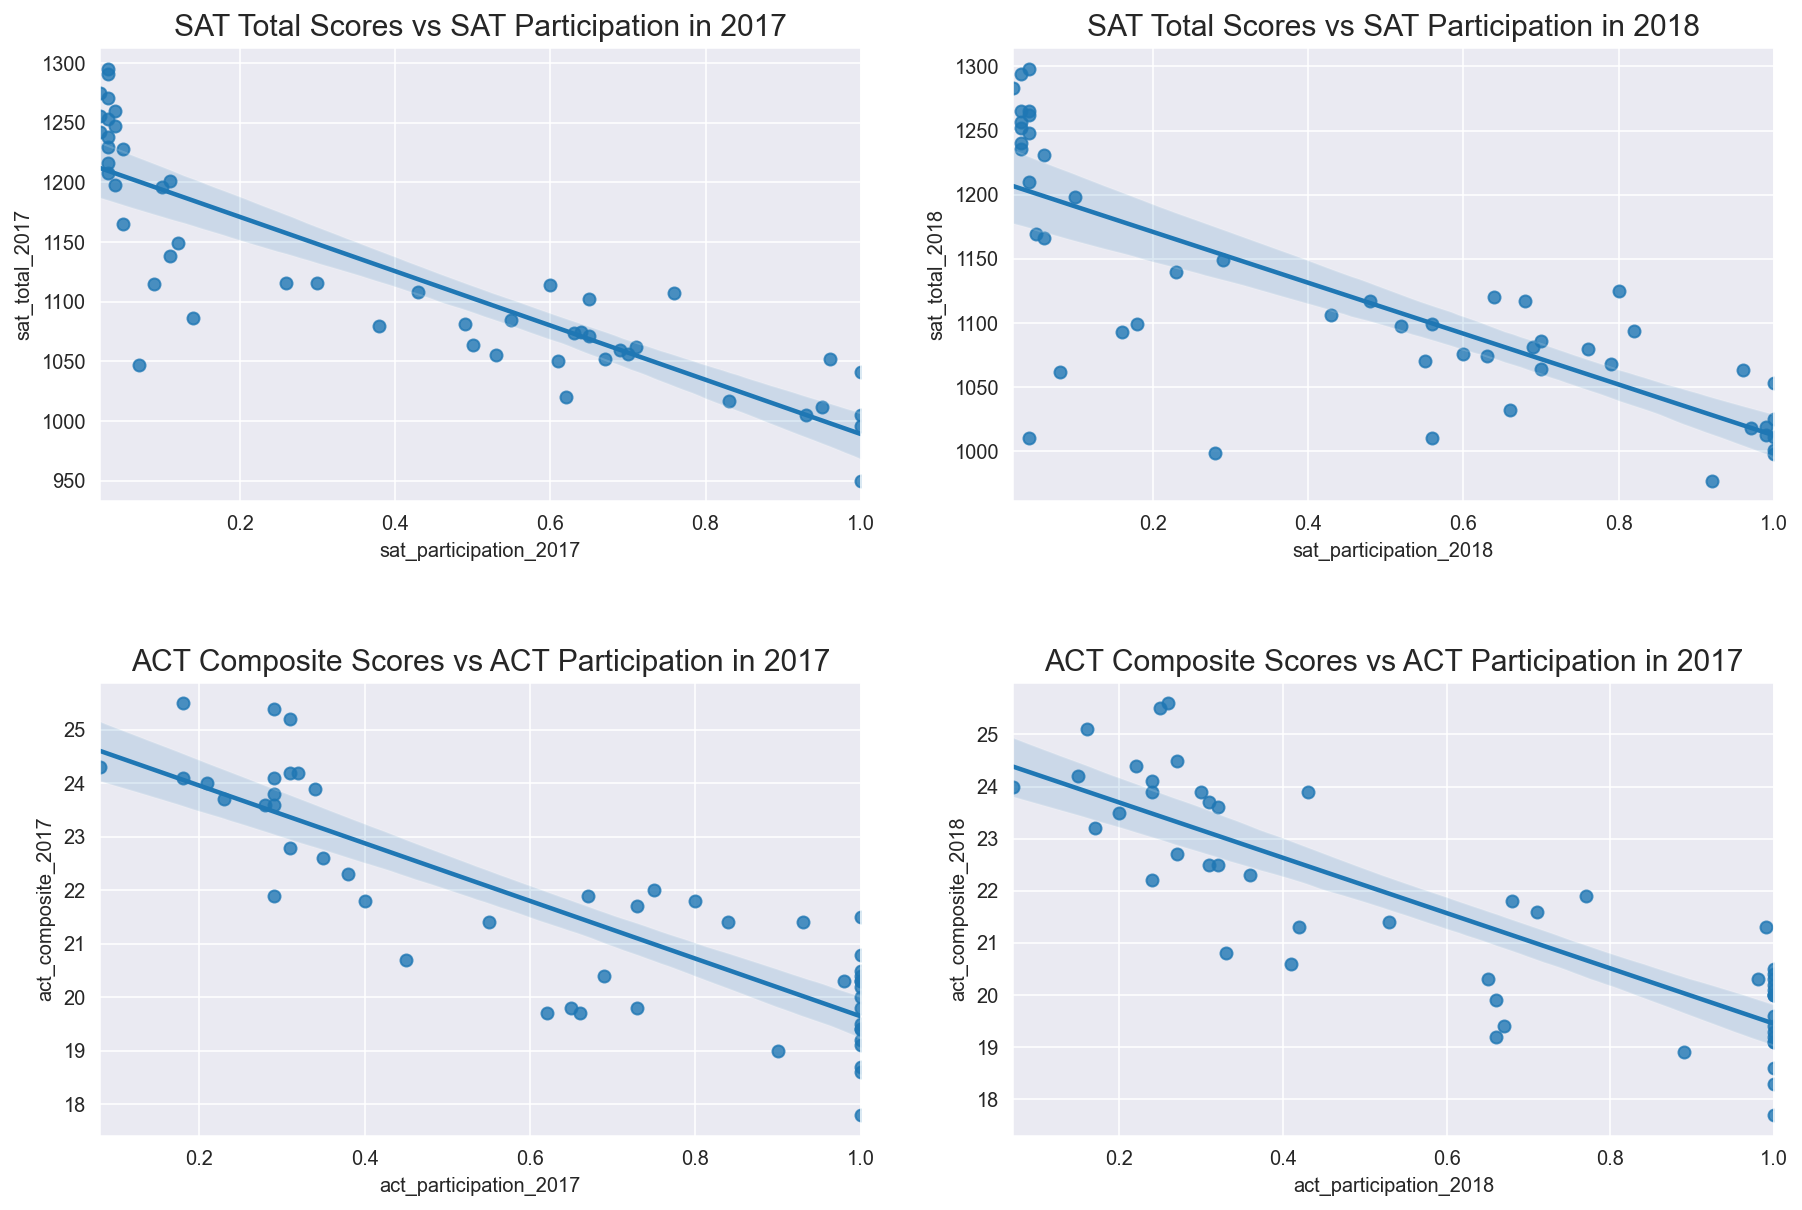

In [107]:
# Subplot for scores of SAT & ACT
list_of_xycolumns = [['sat_participation_2017', 'sat_total_2017'],
                    ['sat_participation_2018', 'sat_total_2018'],
                    ['act_participation_2017', 'act_composite_2017'],
                    ['act_participation_2018', 'act_composite_2018']]
list_of_titles = ['SAT Total Scores vs SAT Participation in 2017',
                  'SAT Total Scores vs SAT Participation in 2018',
                  'ACT Composite Scores vs ACT Participation in 2017',
                  'ACT Composite Scores vs ACT Participation in 2017']
subplot_scatter(final_df, list_of_xycolumns, list_of_titles)

**Observation:**  
From the heatmap above, we observed that there was a seemingly high negative correlation (r <-0.7) between the participation rate and the mean scores. Hence, we plot the above scatterplots to observe the relationship between participation rate and mean scores more closely. From the scatterplots, we are able to see that there is some general trend depicting the negative correlation between the participation rate and mean scores. However, the relationship may not necessarily be as strong as what we initially observed from the heatmap due to the dispersion of the points in the scatterplots. As such, it is probable that what we observed may be the result of **selection bias** and **self-selection bias**. For states with high participation rates, it could be due to mandatory requirements set by the state and students may not take the tests seriously, hence the lower mean scores. For states with low participation rates, the students who took the tests may have done it on their own accord and are higher achievers, resulting in high mean scores.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

![Participation 2017](../images/participation_2017.png)

![Participation 2018](../images/participation_2018.png)

**Observation:**  
From the choropleth maps, we can clearly see a shift in predominance from the ACT in 2017 to SAT in 2018 (red to blue) for the states Colorado and Illinois. Another state of interest would be Florida, where there was a shift in predominance from the SAT in 2017 to ACT in 2018.

In [108]:
# Create dataframe to observe which states had the most significant changes in SAT/ACT participation rates year-to-year
sat_act_change = final_df[['state', 'sat_participation_2017', 'sat_participation_2018', 'act_participation_2017', 'act_participation_2018']].copy()
sat_act_change['sat_participation_change'] = sat_act_change['sat_participation_2018'] - sat_act_change['sat_participation_2017']
sat_act_change['act_participation_change'] = sat_act_change['act_participation_2018'] - sat_act_change['act_participation_2017']
sat_act_change = sat_act_change[['state', 'sat_participation_2017', 'sat_participation_2018', 'sat_participation_change', 'act_participation_2017', 'act_participation_2018', 'act_participation_change']]
sat_act_change.sort_values(by='sat_participation_change', ascending=False).head(10)

,state,sat_participation_2017,sat_participation_2018,sat_participation_change,act_participation_2017,act_participation_2018,act_participation_change
13,Illinois,0.09,0.99,0.90,0.93,0.43,-0.50
5,Colorado,0.11,1.00,0.89,1.00,0.30,-0.70
39,Rhode Island,0.71,0.97,0.26,0.21,0.15,-0.06
48,West Virginia,0.14,0.28,0.14,0.69,0.65,-0.04
30,New Jersey,0.70,0.82,0.12,0.34,0.31,-0.03
32,New York,0.67,0.79,0.12,0.31,0.27,-0.04
10,Georgia,0.61,0.70,0.09,0.55,0.53,-0.02
20,Maryland,0.69,0.76,0.07,0.28,0.31,0.03
12,Idaho,0.93,1.00,0.07,0.38,0.36,-0.02
4,California,0.53,0.60,0.07,0.31,0.27,-0.04


**Observation:**  
We study the top states which had large increases to SAT participation rates from 2017 to 2018 in hopes of figuring out potential strategies which could boost the SAT participation rates. Paying close attention to Illinois and Colorado where we saw a shift in predominance from the choropleth maps above, we observed a very significant increase in SAT participation rates from 2017 to 2018 (90% increase). These two states also experienced a large decrease in ACT participation rates from 2017 to 2018 (Colorado with 70% decrease and Illinois with 50% decrease). Digging into it, we later found that it is highly likely attributed to the changes in state policies where it became mandatory for all Colorado and Illinois juniors to take the SAT test in 2018. We still see a 30% participation rate and 43% participation rate for the ACT 2018 in Colorado and Illinois respectively. It is likely the students wanted to take the ACT in addition to the SAT to improve their chances of college admission.

Another interesting state would be West Virginia, where the West Virginia Department of Education has chosen the SAT as the new statewide standardized test in 2017. All juniors must take the SAT, which was administered for free, unless taking the West Virginia Alternative Summer Assessment or the ACT at their own expense. Despite the state policy, we still observe a relatively low participation rate in the SAT, i.e. 14% in 2017 and 28% in 2018. This may imply that the students prefer taking the alternative test to the SAT and it may be worthwhile investigating further.

In [109]:
sat_act_change[sat_act_change['state'] == 'Florida']

,state,sat_participation_2017,sat_participation_2018,sat_participation_change,act_participation_2017,act_participation_2018,act_participation_change
9,Florida,0.83,0.56,-0.27,0.73,0.66,-0.07


**Observation:**  
From the choropleth map above, we saw that there was a shift in predominance of participation rates in Florida from the SAT in 2017 to the ACT in 2018. We observe that there is a decrease in participation rates for both the SAT and ACT from 2017 to 2018 (27% decrease for SAT participation and 7% decrease for ACT participation). We may want to investigate further on this observation.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [110]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_2018,51.0,0.457451,0.373143,0.02,0.045,0.52,0.775,1.0
sat_erw_2018,51.0,563.686275,47.502627,480.00,534.500,552.00,610.500,643.0
sat_math_2018,51.0,556.235294,47.772623,480.00,522.500,544.00,593.500,655.0
sat_total_2018,51.0,1120.019608,94.155083,977.00,1057.500,1098.00,1204.000,1298.0
act_participation_2018,51.0,0.616471,0.340810,0.07,0.285,0.66,1.000,1.0
act_english_2018,51.0,20.988235,2.446356,16.60,19.100,20.20,23.700,26.0
act_math_2018,51.0,21.125490,2.035765,17.80,19.400,20.70,23.150,25.2
act_reading_2018,51.0,22.015686,2.167245,18.00,20.450,21.60,24.100,26.1
act_science_2018,51.0,21.345098,1.870114,17.90,19.850,21.10,23.050,24.9
act_composite_2018,51.0,21.486275,2.106278,17.70,19.950,21.30,23.550,25.6


Answers:  
___
**Participation Rate**
___
**SAT Participation rate:**  
From the histogram generated above, we observe that the largest bin falls within the 0%-5% participation rate range. The largest bin is constitued by a total of 16 states for each year (i.e. 2017 and 2018). The mean participation rates are 4.0% and 4.6% for years 2017 and 2018 respectively. The standard deviations of participation rate are 3.5% and 3.7% for years 2017 and 2018 respectively. By observing the mean in relation to the median, the distribution for SAT 2017 is slightly right-skewed while the distribution for SAT 2018 is left-skewed.  

**ACT Participation rate:**  
From the histogram generated above, we observe that the largest bin falls within the 95%-100% participation rate range. The largest bin is constitued by a total of 18 states for each year (i.e. 2017 and 2018). The mean participation rates are 65.3% and 61.6% for years 2017 and 2018 respectively. The standard deviations of participation rate are 3.2% and 3.4% for years 2017 and 2018 respectively. By observing the mean in relation to the median, the distributions for ACT 2017 and 2018 are both left-skewed. 

**Comparison of SAT & ACT Participation rates:**  
In general, the average participation rates for the SAT are much lower than that for the ACT within the 51 states. The standard deviations of the participation rate for the SAT are slightly higher compared to that for the ACT, which mean the spread of the SAT participation rate is slightly larger. There is a shift in skewness for the SAT participation distributions year-to-year, whereas the skewness for the ACT participation distributions stayed consistent year-to-year. Overall, the general sensing is that the SAT participation rates are less consistent as compared to the ACT participation.
___
**ERW / Reading**
___

**SAT ERW:**  
From the histogram generated above, we observe that a large proportion of states (i.e. about 31 out of 51) have a mean ERW test score below the average ERW test score of all the states for both years. The mean ERW test scores are 570 and 564 for years 2017 and 2018 respectively. The standard deviations of ERW test scores are 46 and 48 (5% of max possible score) for years 2017 and 2018 respectively. The distributions for SAT 2017 and 2018 are both right-skewed.

**ACT ERW:**  
From the histogram generated above, we observe that a large proportion of states (i.e. about 28 out of 51) have a mean Reading test score below the average Reading test score of all the states for both years. The mean Reading test score is 22 for both years 2017 and 2018. The standard deviations of English test scores is 2 (5% of max possible score) for both years 2017 and 2018. The distributions for ACT 2017 and 2018 are both right-skewed.

**Comparison of SAT & ACT ERW / Reading Scores:**  
In general, the average scores for ERW/Reading tests for both SAT & ACT are below aveage. This may suggest that the students generally do not fare well on verbal/reading tests. There are more states which have below average test scores for the SAT as compared to the ACT. The spread of the SAT ERW test scores are similar that of the ACT Reading test scores. The skewness for the distributions of both SAT and ACT ERW/Reading test scores remained right-skewed year-to-year. Based on the information available, there may be not much variability among student test scores for verbal/reading subjects.   
___
**Math**
___

**SAT Math:**  
From the histogram generated above, we observe that a large proportion of states (i.e. about 32 out of 51) have a mean Math test score below the average Math test score of all the states for both years. The mean Math test scores are about 556 for both years 2017 and 2018. The standard deviations of Math test scores are about 47 (5% of max possible score) for both years 2017 and 2018. The distributions for SAT Math 2017 and 2018 are both right-skewed.

**ACT Math:**  
From the histogram generated above, we observe that a large proportion of states (i.e. about 28 out of 51) have a mean Math test score below the average Math test score of all the states for both years. The mean Math test scores are about 21 for both years 2017 and 2018. The standard deviations of Math test scores are about 2 (5% of max possible score) for both years 2017 and 2018. The distributions for ACT Math 2017 and 2018 are both right-skewed.

**Comparison of SAT & ACT Math Scores:**  
In general, the average scores for Math tests for both SAT & ACT are below aveage. This may suggest that the students generally do not fare well on math tests. There are more states which have below average test scores for the SAT as compared to the ACT. The spread of the SAT ERW test scores are similar that of the ACT Reading test scores. The skewness for the distributions of both SAT and ACT ERW/Reading test scores remained right-skewed year-to-year. Based on the information available, there may be not much variability among student test scores for verbal/reading subjects.
___
**Other subtests**
___

**ACT English:**  
From the histogram generated above, we observe that a large proportion of states (i.e. about 29 out of 51) have a mean English test score below the average English test score of all the states for both years. The mean English test scores are about 21 for both years 2017 and 2018. The standard deviations of English test scores are about 2 (5% of max possible score) for both years 2017 and 2018. The distributions for ACT English 2017 and 2018 are both right-skewed. The skewness for the distribution of the 2017 test scores is less significant as compared to the distribution of the 2018 test scores.

**ACT Science:**  
From the histogram generated above, we observe that about half of the states (i.e. about 26 out of 51) have a mean Science test score below the average Science test score of all the states for both years. The mean Science test scores are about 21 for both years 2017 and 2018. The standard deviations of English test scores are about 2 (5% of max possible score) for both years 2017 and 2018. The distributions for ACT Science 2017 and 2018 are both right-skewed. The skewness for the distribution of the 2017 test scores is less significant as compared to the distribution of the 2018 test scores.
___
**Total/Composite**
___

**SAT Total:**  
From the histogram generated above, we observe that a large proportion of states (i.e. about 32 out of 51) have a mean total score below the average total score of all the states for both years. The mean total scores are 1126 and 1120 for years 2017 and 2018 respectively. The standard deviations of total scores are 92 and 94 (6% of max possible score) for years 2017 and 2018 respectively. The distributions for SAT Total 2017 and 2018 are both right-skewed.

**ACT Composite:**  
From the histogram generated above, we observe that a large proportion of states (i.e. about 28 out of 51) have a mean composite score below the average composite score of all the states for both years. The mean composite scores are about 21.5 for both years 2017 and 2018. The standard deviations of composite scores are about 2 (5% of max possible score) for both years 2017 and 2018. The distributions for ACT Composite 2017 and 2018 are both slightly right-skewed.


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer:  
Observing the histograms and also the means in relation to the medians, it appears that none of data variables follow a normal distribution closely.

For the distribution to be normal, the mean of the data has to be centralized, and the spread of the data needs to be equal on both sides of the mean. The shape of the probability density function should also have a bell-shape. As seen above, the distributions of the data variables are mostly right-skewed. Also, the spikes in frequency for each data variable are not centralized. For example, there are a large proportion of states with a low SAT participation rate (<5%), which does not fall within the criteria of a normal distribution.

The data we sample is skewed due to these possible reasons:
* Some states have regulations in place which makes it mandatory for students to take up the test. This may cause students who do not want to take up the test feel forced and perform worse or differently.
* Some states give students the choice of sitting for either or both SAT and ACT test. This may cause self-selection bias where students take up a test based on their own anticipated success. There may also be cases where students take up both tests and do not perform up to par for one of them since they are taking up the other test.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:  
As explained above, none of the data variables, including Math scores, Reading scores and participation rates follows a normal distribution closely. This means that estimates made from these data which relies on the CLT or normality in the distribution would not be reliable.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:  
It does not make sense to conduct statistical inference on these data. Based on the above observations, it is highly unlikely that the SAT and ACT participation rates in 2017 follow a normal distribution. Statistical inference which rely on the CLT or normality in the distribution of the data variable would not be reliable. Conclusion could not be made based on statistical inference.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer:  
Is it not appropriate to compare between the SAT and ACT math scores. The tests have different scoring systems and were set in different formats. There may also be cases where students took up both SAT and ACT tests which would result in unreliable comparison of the data. Furthermore, from the heatmap and scatter plot above, the correlation between the SAT and ACT math scores is not strong, which means it is hard to say that change in one metric would affect a change in the other.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

![Required Test 2018](../images/required_test_2018.png)

The above choropleth map is created based on information obtained from the following [website](https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/).

In [111]:
# Comparison of participation rates for Colorado
final_df.loc[final_df['state'] == 'Colorado', ['state', 'sat_participation_2017', 'sat_participation_2018', 'act_participation_2017', 'act_participation_2018']].T

,5
state,Colorado
sat_participation_2017,0.11
sat_participation_2018,1
act_participation_2017,1
act_participation_2018,0.3


**Colorado:**  

From above observations, we have seen that Colorado was one of the states with the largest jump in SAT participation rates from 2017 to 2018 (89% increase). Concurrently, there is a large 70% decrease in ACT participation rate. Further research tells us that there were changes in the state policies during the period where it became mandatory for all Colorado high school juniors to take the SAT test ([source](https://www.testive.com/colorado-sat-change-2017/)). There is also no additional cost for students to participate in the mandatory SAT testing. The SAT is also replacing the ACT, which had been given to juniors since 2001 ([source](https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/)). This explains the large drop in ACT participation rates and large increase in SAT participation rates. 

The switch to the SAT was initially planned for 2015, but it had been postponed to Spring 2017 due to complains by the school district superintendents saying the notice period was not long enough for schools to make adjustments and students were not prepared to sit for the SAT then ([source](https://durangoherald.com/articles/1951-colorado-postpones-switch-to-sat-tests-to-spring-2017)). This is why we only see the change in participation rates when comparing the SAT participation rates from 2017 to 2018. It is likely that the 30% ACT participation rate in 2018 was attributed to students who wanted to take both tests to increase their chances of college admission, and also have more test dates to choose from ([source](https://blog.prepscholar.com/do-you-need-to-take-both-the-act-and-sat)).

In [112]:
# Comparison of participation rates for Illinois
final_df.loc[final_df['state'] == 'Illinois', ['state', 'sat_participation_2017', 'sat_participation_2018', 'act_participation_2017', 'act_participation_2018']].T

,13
state,Illinois
sat_participation_2017,0.09
sat_participation_2018,0.99
act_participation_2017,0.93
act_participation_2018,0.43


**Illinois:**  

From above observations, we have seen that Illinois was the other state aside to Colorado with the largest jump in SAT participation rates from 2017 to 2018 (90% increase). Concurrently, there is a large 50% decrease in ACT participation rate. Further research tells us that there were changes in the state policies during the period where it became mandatory for all Illinois high school juniors to take the SAT test in place of the ACT, which was given to students for the past 15 years prior to this change ([source](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html)). The SAT testing will be given to students free of charge. This explains the large drop in ACT participation rates and large increase in SAT participation rates. 

The school systems took a big shock because of the transition to SAT because many things were aligned to the ACT before the news came in ([source](https://patch.com/illinois/winnetka/sat-act-tips-offered-ahead-first-mandatory-state-exam)). School systems needed to quickly adjust to better prepare students for the SAT. Moreover, the ACT team filed a protest with the Illinois State Board of Education (ISBE) for awarding the multi-year contract to the College Board ([source](https://chicago.chalkbeat.org/2018/7/27/21105418/illinois-has-embraced-the-sat-and-the-act-is-mad-about-it)). Although it did not change the decision made by the ISBE, it was still a cause for concern as there could have been a rise in distress among the Illinois students. The SAT participation rates may have a slight dip (99% instead of 100%) due to that. There is still a 43% ACT participation rate in 2018 and could be due to students who wanted to take both tests for an added advantage during college admissions, or students who are high-achievers and just wanted a morale boost ([source](https://chicago.suntimes.com/2018/3/11/18420507/five-juniors-at-whitney-young-high-school-score-perfect-36-on-act)).

In [113]:
# Comparison of participation rates for West Virginia
final_df.loc[final_df['state'] == 'West Virginia', ['state', 'sat_participation_2017', 'sat_participation_2018', 'act_participation_2017', 'act_participation_2018']].T

,48
state,West Virginia
sat_participation_2017,0.14
sat_participation_2018,0.28
act_participation_2017,0.69
act_participation_2018,0.65


**West Virginia:**  

From above observations, we have seen that West Virginia has a relatively low participation rate for the SAT in both years 2017 and 2018. This is in spite of the state policy realised in 2017 where the West Virginia Department of Education (WVDE) chose the SAT as the new statewide standardized test ([source](https://wvde.state.wv.us/news/3413/)). The WVDE felt that the SAT more closely met the specifications of the request for proposals, also considering the fact that the West Virginia students will have access to a large number of resources for free, including the Khan Academy, to prepare for the SAT. It was also a mandatory requirement for all high school juniors to take either the SAT or ACT, unless the student has disabilities, where he/she will be required to take the West Virginia Alternative Summer Assessment instead.  

The difference for students is that the SAT can be taken at no cost, whereas taking the ACT will be at their own expense. Despite that, we still observe a predominance in ACT participation rate for both years. This may imply that the students of West Virginia still prefer taking the ACT over the SAT even though they have to fork out their own money. Further investigation reveals that it is due to the fact that most of the educators in West Virginia were assuming that the ACT contract was going to renewed by the WVDE and it will be kept to status quo ([source](https://www.wvgazettemail.com/news/education/wv-chooses-sat-as-new-high-school-standardized-test-for-juniors/article_b60d2618-4943-56f6-b180-4b4442172ef8.html)). The decision to choose the SAT as the new statewide standardized test was a shock to educators and the lack of anticipation would result in a longer adjustment period for school systems. School systems would have to change their school syllabus and learn how to prepare students better for the SAT. During this adjustment period, students will most likely continue to take up the ACT at their own expense.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Based on the exploration of the data thus far, we have gained much insights on how to further expand the SAT footprint in the U.S. by increasing the SAT participation rates across the states. From year 2017 to 2018, we have seen substantial growth in SAT's participation rates with the help of new contracts between the College Board and Colorado and Illinois. It has taught us that a major factor in increasing SAT's participation rates is having state policies mandating the participation of the SAT. However, there is a caveat in this approach. If the state is switching from ACT testing to the mandatory SAT testing with little to no notice period for educators, the school systems will not be able to cope with the transition. This will result in delays or distress in students. There will not be an immediate increase in SAT participation rates as seen in the case of West Virginia as well.

We have also found that statistical inference which rely on the CLT or normality in the distribution of the variables in our data would not be reliable. Through our observations and research, there are students who would take both the SAT and ACT because they want to increase their chances of college admissions, even in states where taking just one of the tests is required. This may result in self-selection bias and skew the data which we took as samples for analysis. Together with the fact that state policies impose a significant impact on the participation rates, we are unable to draw conclusions from statistical inference.

In spite of this, we did manage to observe a seemingly high positive correlation between the participation rate in 2017 and 2018 for the SAT. This gives us some confidence that if we were to secure a high participation rate the year-to-year participation rate will not have drastic changes unless there is external intervention. However, with additional data such as the state-by-state average household income, number of students participating for each institution, we should be able to learn much more and make a more well-informed recommendation.

Based on our preliminary analysis, I would recommend looking into a state which currently does not have requirements on which test to take, so as to minimize the potential delays that come with transition from one test to the other. We also want to pick out a state with low SAT and ACT participation rates to maximize the impact we have and increasing the value of the resources to commit.

In [114]:
final_df[(final_df['sat_participation_2018']<0.5) & (final_df['act_participation_2018']<0.5)][['state','sat_participation_2017', 'sat_participation_2018', 'act_participation_2017', 'act_participation_2018']]

,state,sat_participation_2017,sat_participation_2018,act_participation_2017,act_participation_2018
1,Alaska,0.38,0.43,0.65,0.33
37,Oregon,0.43,0.48,0.40,0.42


![State Flag](../images/state_flag.png)

I recommend the College Board team to invest in efforts to improve the SAT participation rate for the state of **Oregon**.

Oregon is one of the two states with low (<50%) participation rates for both SAT and ACT in both years. Even though there is currently no requirement on taking either of the tests, we can see that students in Oregon already favours taking the SAT by a slight margin. In comparison, the state of Alaska has seen a high 65% ACT participation in 2017 before dropping to 33% in 2018. We do not know the reasons behind it but could not risk our chances of success. We could capitalize on the preference for the SAT in Oregon and lobby our efforts to increase the SAT participation rate in the state. Furthermore, we observed that Oregon is surrounded by other states, namely Washington, California and Idaho, also with a preference for the SAT in both years. They could possibly create positive influence on our efforts to increase SAT's recognition. Washington and California are also states which currently have no requirement on taking either of the tests. These two states could be potential states to consider investing it if Oregon is succesful.

**Recommended strategies:**  
1. New contract with Oregon to mandate SAT testing in the state and also make it free for high school juniors.
2. Provide SAT School Day for schools in Oregon to make the test easily accessible for students.
3. Notify students of free online resources, such as Khan Academy, which help students to prepare for the test.
4. Invest in marketing campaigns so that it will be more well-received and people more well-informed.
5. Consider providing free meals before the actual test to incentivise students.